# **Experiment 5**



## Support Vector Classifiers


### 0. Import Packages

In [ ]:
! pip install -r https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 16.8 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.1.1 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from matplotlib import pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [ ]:
# initializing lists for storing metrics and results

# models
model_names_list = []

# hyperpameters
C_list = []
kernels = []
degrees = []
gammas = []
probs = []
weights = []
shapes = []
tie_breaks = []

# training metrics
training_accuracy_list = []
training_precision_list = []
training_recall_list = []
training_f1_list = []
training_f2_list = []
training_f3_list = []
training_f4_list = []
training_f10_list = []

# validation metrics
validation_accuracy_list = []
validation_precision_list = []
validation_recall_list = []
validation_f1_list = []
validation_f2_list = []
validation_f3_list = []
validation_f4_list = []
validation_f10_list = []

# generalization gain
accuracy_losses_list = []
precision_losses_list = []
recall_losses_list = []
f1_losses_list = []
f2_losses_list = []
f3_losses_list = []
f4_losses_list = []
f10_losses_list = []

# confusion matrices
cm_train_list = []
cm_val_list = []

In [ ]:
# defining preferences for ConfusionMatrixDisplay

def configure_CM(cm_display, title):
  cm_display.ax_.set_xlabel("Target?")
  cm_display.ax_.set_ylabel("Buys")
  cm_display.ax_.set_xticklabels(["Yes", "No"])
  cm_display.ax_.set_yticklabels(["Yes", "No"])
  cm_display.ax_.set_title(title)

### 1.   Load Dataset

In [ ]:
file_url = "https://raw.githubusercontent.com/karlcatsky/MLAA-Assignment-2/main/df_1%20(1)"

In [ ]:
df = pd.read_csv(file_url)

### 2. Explore Dataset

In [ ]:
df.describe()

,Unnamed: 0,Target,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,...,car_model_model_4,car_model_model_5,car_model_model_6,car_model_model_7,car_model_model_8,car_model_model_9,car_segment_LCV,car_segment_Large/SUV,car_segment_Other,car_segment_Small/Medium
count,131337.00000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,...,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000
mean,65668.00000,0.026809,5.493022,5.452500,5.472517,5.452287,5.497050,5.481692,5.454967,5.469807,...,0.115390,0.187868,0.023383,0.062184,0.049057,0.007568,0.187350,0.396842,0.000442,0.415367
std,37913.87049,0.161525,2.843299,2.884328,2.870665,2.886528,2.878699,2.880408,2.875961,2.859756,...,0.319493,0.390608,0.151116,0.241490,0.215988,0.086667,0.390194,0.489245,0.021010,0.492787
min,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32834.00000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65668.00000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,98502.00000,0.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,131336.00000,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131337 entries, 0 to 131336
Data columns (total 36 columns):
 #   Column                     Non-Null Count   Dtype
---  ------                     --------------   -----
 0   Unnamed: 0                 131337 non-null  int64
 1   Target                     131337 non-null  int64
 2   age_of_vehicle_years       131337 non-null  int64
 3   sched_serv_warr            131337 non-null  int64
 4   non_sched_serv_warr        131337 non-null  int64
 5   sched_serv_paid            131337 non-null  int64
 6   non_sched_serv_paid        131337 non-null  int64
 7   total_paid_services        131337 non-null  int64
 8   total_services             131337 non-null  int64
 9   mth_since_last_serv        131337 non-null  int64
 10  annualised_mileage         131337 non-null  int64
 11  num_dealers_visited        131337 non-null  int64
 12  num_serv_dealer_purchased  131337 non-null  int64
 13  car_model_model_1          131337 non-null  int64
 14  car_

In [ ]:
df.columns

Index(['Unnamed: 0', 'Target', 'age_of_vehicle_years', 'sched_serv_warr',
       'non_sched_serv_warr', 'sched_serv_paid', 'non_sched_serv_paid',
       'total_paid_services', 'total_services', 'mth_since_last_serv',
       'annualised_mileage', 'num_dealers_visited',
       'num_serv_dealer_purchased', 'car_model_model_1', 'car_model_model_10',
       'car_model_model_11', 'car_model_model_12', 'car_model_model_13',
       'car_model_model_14', 'car_model_model_15', 'car_model_model_16',
       'car_model_model_17', 'car_model_model_18', 'car_model_model_19',
       'car_model_model_2', 'car_model_model_3', 'car_model_model_4',
       'car_model_model_5', 'car_model_model_6', 'car_model_model_7',
       'car_model_model_8', 'car_model_model_9', 'car_segment_LCV',
       'car_segment_Large/SUV', 'car_segment_Other',
       'car_segment_Small/Medium'],
      dtype='object')

### 3. Explore Target variable

In [ ]:
target = df['Target']

In [ ]:
target.describe()

count    131337.000000
mean          0.026809
std           0.161525
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Target, dtype: float64

In [ ]:
target_counts = target.value_counts()
target_counts

Target
0    127816
1      3521
Name: count, dtype: int64

In [ ]:
target_imbalance = (target_counts[1] / target_counts[0]).round(2)
print(f"Target Imbalance: {target_imbalance} %")

Target Imbalance: 0.03 %


### 4. Explore Variables of Interest

In [ ]:
# Defining a function to:
#   Calculate a response rate for each unique value in a column
#   Display a barchart showing response rates
#   Take as input: dataframe, column

def respond_and_chart(data, col, target):
  # unique values
  vals = data[col].unique()
  # rr dict
  RRs = {}
  # locate unique vals
  for val in vals:
    rows = data.loc[data[col] == val]
    rr = rows[target].mean()
    # store in a dict
    RRs[val] = rr
  # make and display barchart
  plt.bar(*zip(*RRs.items()))
  plt.xlabel(f"{col}")
  plt.ylabel('Response Rate')
  plt.title(f'Response Rate by {col}')
  plt.show()

  return RRs

In [ ]:
# iterate through cols to find the lowest and highest response rates
# the respond() function returns a dict, with unique values for the col as keys, and rrs as values
# goal is to find:
#   highest and lowest stdev's in rr (how predictive might the col be)
#   highest and lowest mean response rates, determined by summing RRs and dividing by number of unique values

# simplified version of respond without printing:
def respond(data, col, target):
  # unique values
  vals = data[col].unique()
  # rr dict
  RRs = {}
  # locate unique vals
  for val in vals:
    rows = data.loc[data[col] == val]
    rr = rows[target].mean()
    # store in a dict
    RRs[val] = rr
  # find RR stdev
  rr_values = list(RRs.values())
  stdev = np.std(rr_values)
  agg_rr = np.sum(rr_values)
  mean_rr = np.mean(rr_values)
  # add info to df
  # RR_df = pd.DataFrame({
  #     'Variable': [col],
  #     'Stdev': [stdev],
  #     'Mean': [mean_rr],
  #     'Aggregate': [agg_rr]
  # })
  return [col, stdev, mean_rr, agg_rr]

results = []

# call respond() for every col in df
for col in df.columns:
  results.append(respond(df, col, 'Target'))

results_df = pd.DataFrame(results, columns=['Variable', 'Stdev', 'Mean', 'Aggregate'])
results_df

,Variable,Stdev,Mean,Aggregate
0,Unnamed: 0,0.161525,0.026809,3521.000000
1,Target,0.500000,0.500000,1.000000
2,age_of_vehicle_years,0.022659,0.026389,0.263886
3,sched_serv_warr,0.033278,0.026106,0.261058
4,non_sched_serv_warr,0.017314,0.026627,0.266266
5,sched_serv_paid,0.031654,0.026149,0.261489
6,non_sched_serv_paid,0.005360,0.026795,0.267946
7,total_paid_services,0.014883,0.026674,0.266735
8,total_services,0.032850,0.026126,0.261260
9,mth_since_last_serv,0.026203,0.026513,0.265129


Assess feature importances returned from experiment 2

In [ ]:
#results_df.drop(0, inplace=True)
results_df.drop(1, inplace=True)
rr_variance = results_df.sort_values('Stdev', ascending=False)
rr_agg = results_df.sort_values('Aggregate', ascending=False)
rr_mean = results_df.sort_values('Mean', ascending=False)

The table below shows us how much variance there is in the response rate for the values in a column. This is a proxy for the predictive power of the variable (how much response rate changes depending on the value). The lowest stdevs at the bottom of the table show variables whose values have near-identical response rates. These suggest predictors with less predictive power. We can note that the rankings here are similar to the rankings for Feature Importances from Experiment 1.

In [ ]:
rr_variance

,Variable,Stdev,Mean,Aggregate
0,Unnamed: 0,0.161525,0.026809,3521.000000
3,sched_serv_warr,0.033278,0.026106,0.261058
8,total_services,0.032850,0.026126,0.261260
5,sched_serv_paid,0.031654,0.026149,0.261489
9,mth_since_last_serv,0.026203,0.026513,0.265129
2,age_of_vehicle_years,0.022659,0.026389,0.263886
4,non_sched_serv_warr,0.017314,0.026627,0.266266
10,annualised_mileage,0.015474,0.026688,0.266882
7,total_paid_services,0.014883,0.026674,0.266735
17,car_model_model_13,0.013982,0.040639,0.081279


The table below shows us the mean response rate for variables. This information is important, because we do want to bias our models towards capturing as many Positives (1s) as possible (i.e. maximizing Recall score). Variables may have low stdev in rr (meaning variable is not that helpful in classification) but have a relatively high response rate. Feature Importance and stdev rr might tempt us to drop these variables because of the low stdev, but this might perversely make it harder to capture Positives, so long as we instruct our models to weight Positives in proportion to their sparsity in the dataset.

In [ ]:
rr_mean

,Variable,Stdev,Mean,Aggregate
17,car_model_model_13,0.013982,0.040639,0.081279
22,car_model_model_18,0.011357,0.038148,0.076296
25,car_model_model_3,0.007044,0.032021,0.064043
29,car_model_model_7,0.005030,0.031213,0.062427
20,car_model_model_16,0.004143,0.030945,0.061889
30,car_model_model_8,0.003694,0.030141,0.060282
19,car_model_model_15,0.001570,0.028371,0.056741
32,car_segment_LCV,0.002134,0.028143,0.056286
33,car_segment_Large/SUV,0.002445,0.027313,0.054627
13,car_model_model_1,0.000258,0.027007,0.054014


importing Feature Importances from experiment 1

In [ ]:
fi_url = "https://raw.githubusercontent.com/karlcatsky/MLAA-Assignment-2/main/Agg%20FIs%20for%20best%20RFs%20(1)"
FIs = pd.read_csv(fi_url)
FIs.drop('Unnamed: 0', inplace=True, axis=1)
FIs

,Feature,Importance (%) GS,Importance (%) RF30,Importance (%) RF30A,Mean Importance (%)
0,sched_serv_warr,19.52,19.42,19.42,19.45
1,total_services,16.93,18.37,18.37,17.89
2,sched_serv_paid,16.61,16.57,16.57,16.58
3,mth_since_last_serv,16.13,15.82,15.82,15.92
4,age_of_vehicle_years,8.93,9.07,9.07,9.02
5,annualised_mileage,7.58,7.24,7.24,7.35
6,non_sched_serv_warr,3.67,4.03,4.03,3.91
7,total_paid_services,2.79,2.59,2.59,2.66
8,num_dealers_visited,2.75,2.54,2.54,2.61
9,num_serv_dealer_purchased,2.72,2.31,2.31,2.45


### 5. Prepare Data

In [ ]:
df_clean = df.drop('Unnamed: 0', axis=1)

In [ ]:
df_clean.columns

Index(['Target', 'age_of_vehicle_years', 'sched_serv_warr',
       'non_sched_serv_warr', 'sched_serv_paid', 'non_sched_serv_paid',
       'total_paid_services', 'total_services', 'mth_since_last_serv',
       'annualised_mileage', 'num_dealers_visited',
       'num_serv_dealer_purchased', 'car_model_model_1', 'car_model_model_10',
       'car_model_model_11', 'car_model_model_12', 'car_model_model_13',
       'car_model_model_14', 'car_model_model_15', 'car_model_model_16',
       'car_model_model_17', 'car_model_model_18', 'car_model_model_19',
       'car_model_model_2', 'car_model_model_3', 'car_model_model_4',
       'car_model_model_5', 'car_model_model_6', 'car_model_model_7',
       'car_model_model_8', 'car_model_model_9', 'car_segment_LCV',
       'car_segment_Large/SUV', 'car_segment_Other',
       'car_segment_Small/Medium'],
      dtype='object')

### 6. Split Dataset

importing splits from experiment 1

In [ ]:
X_train_url = "https://raw.githubusercontent.com/karlcatsky/MLAA-Assignment-2/main/X_train_1"
X_val_url = "https://raw.githubusercontent.com/karlcatsky/MLAA-Assignment-2/main/X_val_1"
X_test_url = "https://raw.githubusercontent.com/karlcatsky/MLAA-Assignment-2/main/X_test_1"

y_train_url = "https://raw.githubusercontent.com/karlcatsky/MLAA-Assignment-2/main/y_train_1"
y_val_url = "https://raw.githubusercontent.com/karlcatsky/MLAA-Assignment-2/main/y_val_1"
y_test_url = "https://raw.githubusercontent.com/karlcatsky/MLAA-Assignment-2/main/y_test_1"

X_train = pd.read_csv(X_train_url)
X_val = pd.read_csv(X_val_url)
X_test = pd.read_csv(X_test_url)

y_train = pd.read_csv(y_train_url)
y_val = pd.read_csv(y_val_url)
y_test = pd.read_csv(y_test_url)

In [ ]:
datasets = [X_train, X_val, X_test, y_train, y_val, y_test]

# restoring original indices

for dataset in datasets:
  dataset.set_index('Unnamed: 0', inplace=True, verify_integrity=True)
  print(dataset.columns)
  print("")

Index(['age_of_vehicle_years', 'sched_serv_warr', 'non_sched_serv_warr',
       'sched_serv_paid', 'non_sched_serv_paid', 'total_paid_services',
       'total_services', 'mth_since_last_serv', 'annualised_mileage',
       'num_dealers_visited', 'num_serv_dealer_purchased', 'car_model_model_1',
       'car_model_model_10', 'car_model_model_11', 'car_model_model_12',
       'car_model_model_13', 'car_model_model_14', 'car_model_model_15',
       'car_model_model_16', 'car_model_model_17', 'car_model_model_18',
       'car_model_model_19', 'car_model_model_2', 'car_model_model_3',
       'car_model_model_4', 'car_model_model_5', 'car_model_model_6',
       'car_model_model_7', 'car_model_model_8', 'car_model_model_9',
       'car_segment_LCV', 'car_segment_Large/SUV', 'car_segment_Other',
       'car_segment_Small/Medium'],
      dtype='object')

Index(['age_of_vehicle_years', 'sched_serv_warr', 'non_sched_serv_warr',
       'sched_serv_paid', 'non_sched_serv_paid', 'total_paid_services',

In [ ]:
y_train = y_train['Target']
y_val = y_val['Target']
y_test = y_test['Target']

In [ ]:
for dataset in datasets:
  dataset.index.rename("Index", inplace=True)
  print(dataset.head().index)
  print(dataset.tail().index)
  print("")

Index([62240, 57864, 108896, 19747, 58454], dtype='int64', name='Index')
Index([21568, 121526, 99055, 86959, 69655], dtype='int64', name='Index')

Index([78749, 124225, 89057, 117989, 33437], dtype='int64', name='Index')
Index([97691, 81229, 6043, 92109, 67129], dtype='int64', name='Index')

Index([20850, 119184, 33941, 39776, 14297], dtype='int64', name='Index')
Index([69096, 68154, 18628, 110337, 112250], dtype='int64', name='Index')

Index([62240, 57864, 108896, 19747, 58454], dtype='int64', name='Index')
Index([21568, 121526, 99055, 86959, 69655], dtype='int64', name='Index')

Index([78749, 124225, 89057, 117989, 33437], dtype='int64', name='Index')
Index([97691, 81229, 6043, 92109, 67129], dtype='int64', name='Index')

Index([20850, 119184, 33941, 39776, 14297], dtype='int64', name='Index')
Index([69096, 68154, 18628, 110337, 112250], dtype='int64', name='Index')



In [ ]:
print(y_train.value_counts())
print(y_val.value_counts())
print(y_test.value_counts())

Target
0    81801
1     2254
Name: count, dtype: int64
Target
0    20451
1      563
Name: count, dtype: int64
Target
0    25564
1      704
Name: count, dtype: int64


In [ ]:
# import feature importances from experiment 1 to refine X

FI_url = "https://raw.githubusercontent.com/karlcatsky/MLAA-Assignment-2/main/Agg%20FIs%20for%20best%20RFs%20(1)"
FIs = pd.read_csv(FI_url)
FIs.drop('Unnamed: 0', axis=1, inplace=True)
FIs.head(20)

,Feature,Importance (%) GS,Importance (%) RF30,Importance (%) RF30A,Mean Importance (%)
0,sched_serv_warr,19.52,19.42,19.42,19.45
1,total_services,16.93,18.37,18.37,17.89
2,sched_serv_paid,16.61,16.57,16.57,16.58
3,mth_since_last_serv,16.13,15.82,15.82,15.92
4,age_of_vehicle_years,8.93,9.07,9.07,9.02
5,annualised_mileage,7.58,7.24,7.24,7.35
6,non_sched_serv_warr,3.67,4.03,4.03,3.91
7,total_paid_services,2.79,2.59,2.59,2.66
8,num_dealers_visited,2.75,2.54,2.54,2.61
9,num_serv_dealer_purchased,2.72,2.31,2.31,2.45


In [ ]:
imp_feats = FIs['Feature'].iloc[0:11]
imp_feats.values

array(['sched_serv_warr', 'total_services', 'sched_serv_paid',
       'mth_since_last_serv', 'age_of_vehicle_years',
       'annualised_mileage', 'non_sched_serv_warr', 'total_paid_services',
       'num_dealers_visited', 'num_serv_dealer_purchased',
       'non_sched_serv_paid'], dtype=object)

X2 is the selective featureset based on Feature Importance analysis from previous experiments

In [ ]:
X2_train = X_train[['sched_serv_warr', 'total_services', 'sched_serv_paid',
       'mth_since_last_serv', 'age_of_vehicle_years',
       'annualised_mileage', 'non_sched_serv_warr', 'total_paid_services',
       'num_dealers_visited', 'num_serv_dealer_purchased',
       'non_sched_serv_paid']]

X2_val = X_val[['sched_serv_warr', 'total_services', 'sched_serv_paid',
       'mth_since_last_serv', 'age_of_vehicle_years',
       'annualised_mileage', 'non_sched_serv_warr', 'total_paid_services',
       'num_dealers_visited', 'num_serv_dealer_purchased',
       'non_sched_serv_paid']]

X2_test = X_test[['sched_serv_warr', 'total_services', 'sched_serv_paid',
       'mth_since_last_serv', 'age_of_vehicle_years',
       'annualised_mileage', 'non_sched_serv_warr', 'total_paid_services',
       'num_dealers_visited', 'num_serv_dealer_purchased',
       'non_sched_serv_paid']]

In [ ]:
X2_train

,sched_serv_warr,total_services,sched_serv_paid,mth_since_last_serv,age_of_vehicle_years,annualised_mileage,non_sched_serv_warr,total_paid_services,num_dealers_visited,num_serv_dealer_purchased,non_sched_serv_paid
Index,,,,,,,,,,,
62240,6,7,9,6,10,4,8,10,10,7,10
57864,7,7,7,9,5,6,8,4,3,8,4
108896,10,9,10,3,8,9,7,9,8,9,6
19747,10,10,10,5,7,10,10,10,10,4,9
58454,9,9,9,4,8,9,9,6,7,10,4
...,...,...,...,...,...,...,...,...,...,...,...
21568,10,10,10,4,10,10,10,10,10,5,10
121526,4,2,5,8,6,4,3,3,3,2,3
99055,1,1,1,1,1,1,2,2,2,2,2


In [ ]:
X2_val

,sched_serv_warr,total_services,sched_serv_paid,mth_since_last_serv,age_of_vehicle_years,annualised_mileage,non_sched_serv_warr,total_paid_services,num_dealers_visited,num_serv_dealer_purchased,non_sched_serv_paid
Index,,,,,,,,,,,
78749,4,3,4,3,2,5,4,6,8,5,7
124225,3,6,5,9,9,7,8,5,9,4,6
89057,10,8,10,8,7,9,6,10,9,5,9
117989,6,7,7,9,5,6,8,10,7,9,10
33437,8,9,9,6,10,9,9,8,5,2,6
...,...,...,...,...,...,...,...,...,...,...,...
97691,5,5,7,5,4,8,6,9,6,7,9
81229,10,10,10,3,7,10,7,9,5,10,8
6043,5,5,9,10,10,7,5,6,6,3,4


In [ ]:
X2_test

,sched_serv_warr,total_services,sched_serv_paid,mth_since_last_serv,age_of_vehicle_years,annualised_mileage,non_sched_serv_warr,total_paid_services,num_dealers_visited,num_serv_dealer_purchased,non_sched_serv_paid
Index,,,,,,,,,,,
20850,7,10,5,6,6,10,10,8,9,10,9
119184,10,8,8,3,5,9,2,5,8,9,2
33941,10,7,8,4,6,10,2,5,3,2,3
39776,4,4,3,4,3,4,4,3,7,5,4
14297,1,1,2,1,4,1,1,1,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...
69096,5,6,7,5,5,7,7,10,4,7,10
68154,6,7,5,6,8,7,9,9,10,8,10
18628,7,9,8,6,5,8,10,10,3,2,10


Feature scaling using MinMax.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().set_output(transform="pandas")
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

### 7. Baseline Model

In [ ]:
# defining a function to generate an Extra Trees model and store results to lists
# this version of the function uses the selective featureset X2

def support_vectors(name, X_train=X_train, X_val=X_val, C=1.0, kernel='rbf', degree=3, gamma='scale', probability=False, class_weight=None, decision_function_shape='ovr', break_ties=False):
  # instantiating model with specified hyperparameters
  model = SVC(C=C, kernel=kernel, degree=degree, gamma=gamma, probability=probability, class_weight=class_weight, decision_function_shape=decision_function_shape, break_ties=break_ties, random_state=1917)
  # fitting model
  model.fit(X_train, y_train)
  # training results
  preds_train = model.predict(X_train)
  accuracy_train = accuracy_score(y_train, preds_train)
  precision_train = precision_score(y_train, preds_train, labels=[1, 0])
  recall_train = recall_score(y_train, preds_train, labels=[1, 0])
  f1_train = f1_score(y_train, preds_train, labels=[1, 0])
  f2_train = fbeta_score(y_train, preds_train, beta=2, labels=[1, 0])
  f3_train = fbeta_score(y_train, preds_train, beta=3, labels=[1, 0])
  f4_train = fbeta_score(y_train, preds_train, beta=4, labels=[1, 0])
  f10_train = fbeta_score(y_train, preds_train, beta=10, labels=[1, 0])

  # validation results
  preds_val = model.predict(X_val)
  accuracy_val = accuracy_score(y_val, preds_val)
  precision_val = precision_score(y_val, preds_val, labels=[1, 0])
  recall_val = recall_score(y_val, preds_val, labels=[1, 0])
  f1_val = f1_score(y_val, preds_val, labels=[1, 0])
  f2_val = fbeta_score(y_val, preds_val, beta=2, labels=[1, 0])
  f3_val = fbeta_score(y_val, preds_val, beta=3, labels=[1, 0])
  f4_val = fbeta_score(y_val, preds_val, beta=4, labels=[1, 0])
  f10_val = fbeta_score(y_val, preds_val, beta=10, labels=[1, 0])

  # Generalization loss
  accuracy_loss = accuracy_train - accuracy_val
  precision_loss = precision_train - precision_val
  recall_loss = recall_train - recall_val
  f1_loss = f1_train - f1_val
  f2_loss = f2_train - f2_val
  f3_loss = f3_train - f2_val
  f4_loss = f4_train - f4_val
  f10_loss = f10_train - f10_val

  # Storing info in lists

  # appending parameters
  model_names_list.append(name)
  C_list.append(C)
  kernels.append(kernel)
  degrees.append(degree)
  gammas.append(gamma)
  probs.append(probability)
  weights.append(class_weight)
  shapes.append(decision_function_shape)
  tie_breaks.append(break_ties)

  # appending training metrics
  training_accuracy_list.append(accuracy_train)
  training_precision_list.append(precision_train)
  training_recall_list.append(recall_train)
  training_f1_list.append(f1_train)
  training_f2_list.append(f2_train)
  training_f3_list.append(f3_train)
  training_f4_list.append(f4_train)
  training_f10_list.append(f10_train)

  # appending validation metrics
  validation_accuracy_list.append(accuracy_val)
  validation_precision_list.append(precision_val)
  validation_recall_list.append(recall_val)
  validation_f1_list.append(f1_val)
  validation_f2_list.append(f2_val)
  validation_f3_list.append(f3_val)
  validation_f4_list.append(f4_val)
  validation_f10_list.append(f10_val)

  # appending generalization margins
  accuracy_losses_list.append(accuracy_loss)
  precision_losses_list.append(precision_loss)
  recall_losses_list.append(recall_loss)
  f1_losses_list.append(f1_loss)
  f2_losses_list.append(f2_loss)
  f3_losses_list.append(f3_loss)
  f4_losses_list.append(f4_loss)
  f10_losses_list.append(f10_loss)

  # Printing key measures
  print(f"Results for {name}")
  print("   On Training Data:")
  print("     Accuracy: %", (accuracy_train * 100).round(3))
  print("     Precision: %", (precision_train * 100).round(3))
  print("     Recall: %", (recall_train * 100).round(3))
  # print("     F1 Score: ", f1_train)
  # print("     F2 Score: ", f2_train)
  # print("     F3 Score: ", f3_train)
  print("     F4 Score: %", (f4_train * 100).round(3))
  print("     F10 Score: %", (f10_train * 100).round(3))
  print("   On Validation Data:")
  print("     Accuracy: %", (accuracy_val * 100).round(3))
  print("     Precision: %", (precision_val * 100).round(3))
  print("     Recall: %", (recall_val * 100).round(3))
  # print("     F1 Score: ", f1_val)
  # print("     F2 Score: ", f2_val)
  # print("     F3 Score: ", f3_val)
  print("     F4 Score: %", (f3_val * 100).round(3))
  print("     F10 Score: %", (f10_val * 100).round(3))
  print("")
  print("   Generalization Losses:")
  print("     Accuracy: %", (accuracy_loss * 100).round(3))
  print("     Precision: %", (precision_loss * 100).round(3))
  print("     Recall: %", (recall_loss * 100).round(3))
  # print(f"F1 Generalization Loss for {name}: ", f1_loss)
  print("     F4: %", (f4_loss * 100).round(3))
  print("     F10: %", (f10_loss * 100).round(3))
  print("")
  # Confusion Matrices
  cm_train = confusion_matrix(y_train, preds_train, labels=[1, 0])
  cm_val = confusion_matrix(y_val, preds_val, labels=[1, 0])
  cm_train_list.append(cm_train)
  cm_val_list.append(cm_val)

  print("   Confusion Matrices")
  print("")
  print("     Training:")
  print(cm_train)
  print("")
  print("     Validation:")
  print(cm_val)

  train_CM = ConfusionMatrixDisplay.from_predictions(y_train, preds_train, labels=[1, 0])
  configure_CM(train_CM, f"{name} Confusion Matrix on Training Data")
  plt.show()

  val_CM = ConfusionMatrixDisplay.from_predictions(y_val, preds_val, labels=[1, 0])
  configure_CM(val_CM, f"{name} Confusion Matrix on Validation Data")
  plt.show()
  # return model
  return model

In [ ]:
base_train = np.full(y_train.shape, 0)
base_val = np.full(y_val.shape, 0)

In [ ]:
train_perf = y_train
valid_perf = y_val
test_perf = y_test

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, confusion_matrix, ConfusionMatrixDisplay

Training results: 

Accuracy of Baseline Model:  0.9731842246148356
Precision of Baseline Model:  0.0
Recall of Baseline Model:  0.0
F1 Score of Baseline Model:  0.0
F2 Score of Baseline Model:  0.0
F3 Score of Baseline Model:  0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F4 Score of Baseline Model:  0.0
F10 Score of Baseline Model:  0.0
[[    0  2254]
 [    0 81801]]

Validation Results: 

Accuracy of Baseline Model:  0.9732083372989435
Precision of Baseline Model:  0.0
Recall of Baseline Model:  0.0
F1 Score of Baseline Model:  0.0
F2 Score of Baseline Model:  0.0
F3 Score of Baseline Model:  0.0
F4 Score of Baseline Model:  0.0
F10 Score of Baseline Model:  0.0
[[    0   563]
 [    0 20451]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


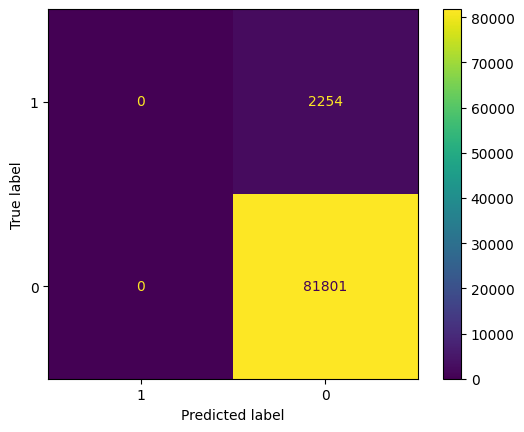

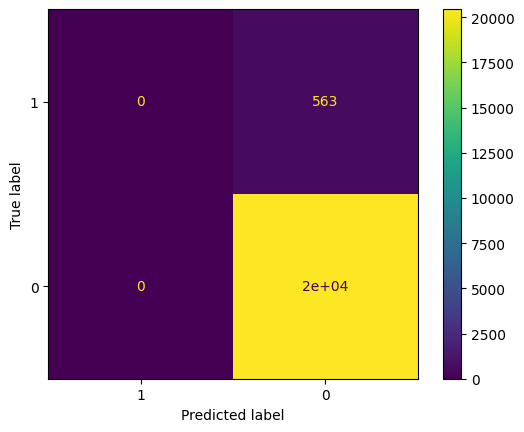

In [ ]:
print("Training results: ")
print("")

accuracy_base_train = accuracy_score(y_train, base_train)
print("Accuracy of Baseline Model: ", accuracy_base_train)

precision_base_train = precision_score(y_train, base_train, labels=[1, 0])
print("Precision of Baseline Model: ", precision_base_train)

recall_base_train = recall_score(y_train, base_train, labels=[1, 0])
print("Recall of Baseline Model: ", recall_base_train)

f1_base_train = f1_score(y_train, base_train, labels=[1, 0])
print("F1 Score of Baseline Model: ", f1_base_train)

f2_base_train = fbeta_score(y_train, base_train, beta=2, labels=[1,0])
print("F2 Score of Baseline Model: ", f2_base_train)

f3_base_train = fbeta_score(y_train, base_train, beta=3, labels=[1,0])
print("F3 Score of Baseline Model: ", f3_base_train)

f4_base_train = fbeta_score(y_train, base_train, beta=4, labels=[1,0])
print("F4 Score of Baseline Model: ", f4_base_train)

f10_base_train = fbeta_score(y_train, base_train, beta=3, labels=[1,0])
print("F10 Score of Baseline Model: ", f3_base_train)

cm_base_train = confusion_matrix(y_train, base_train, labels=[1, 0])
print(cm_base_train)

print("")
print("Validation Results: ")
print("")
accuracy_base_val = accuracy_score(y_val, base_val)
print("Accuracy of Baseline Model: ", accuracy_base_val)

precision_base_val = precision_score(y_val, base_val, labels=[1, 0])
print("Precision of Baseline Model: ", precision_base_val)

recall_base_val = recall_score(y_val, base_val, labels=[1, 0])
print("Recall of Baseline Model: ", recall_base_val)

f1_base_val = f1_score(y_val, base_val, labels=[1, 0])
print("F1 Score of Baseline Model: ", f1_base_val)

f2_base_val = fbeta_score(y_val, base_val, beta=2, labels=[1,0])
print("F2 Score of Baseline Model: ", f2_base_val)

f3_base_val = fbeta_score(y_val, base_val, beta=3, labels=[1,0])
print("F3 Score of Baseline Model: ", f3_base_val)

f4_base_val = fbeta_score(y_val, base_val, beta=4, labels=[1,0])
print("F4 Score of Baseline Model: ", f4_base_val)

f10_base_val = fbeta_score(y_val, base_val, beta=10, labels=[1,0])
print("F10 Score of Baseline Model: ", f10_base_val)

cm_base_val = confusion_matrix(y_val, base_val, labels=[1, 0])
print(cm_base_val)

accuracy_base_loss = accuracy_base_train - accuracy_base_val
precision_base_loss = precision_base_train - precision_base_val
recall_base_loss = recall_base_train - recall_base_val
f1_base_loss = f1_base_train - f1_base_val
f2_base_loss = f2_base_train - f2_base_val
f3_base_loss = f3_base_train - f3_base_val
f4_base_loss = f4_base_train - f4_base_val
f10_base_loss = f10_base_train - f10_base_val

# appending to lists

model_names_list.append("Baseline")
C_list.append(None)
kernels.append(None)
degrees.append(None)
gammas.append(None)
probs.append(None)
weights.append(None)
shapes.append(None)
tie_breaks.append(None)

training_accuracy_list.append(accuracy_base_train)
training_precision_list.append(precision_base_train)
training_recall_list.append(recall_base_train)
training_f1_list.append(f1_base_train)
training_f2_list.append(f2_base_train)
training_f3_list.append(f3_base_train)
training_f4_list.append(f4_base_train)
training_f10_list.append(f10_base_train)

validation_accuracy_list.append(accuracy_base_val)
validation_precision_list.append(precision_base_val)
validation_recall_list.append(recall_base_val)
validation_f1_list.append(f1_base_val)
validation_f2_list.append(f2_base_val)
validation_f3_list.append(f3_base_val)
validation_f4_list.append(f4_base_val)
validation_f10_list.append(f10_base_val)

accuracy_losses_list.append(accuracy_base_loss)
precision_losses_list.append(precision_base_loss)
recall_losses_list.append(recall_base_loss)
f1_losses_list.append(f1_base_loss)
f2_losses_list.append(f2_base_loss)
f3_losses_list.append(f3_base_loss)
f4_losses_list.append(f4_base_loss)
f10_losses_list.append(f10_base_loss)

cm_train_list.append(cm_base_train)
cm_val_list.append(cm_base_val)

ConfusionMatrixDisplay.from_predictions(y_train, base_train, labels=[1, 0])
ConfusionMatrixDisplay.from_predictions(y_val, base_val, labels=[1, 0])

### 8. Train Support Vector Classifiers

"The fit time scales at least quadratically with the number of samples and may be impractical beyond tens of thousands of samples. For large datasets consider using LinearSVC or SGDClassifier instead, possibly after a Nystroem transformer or other Kernel Approximation."

In [ ]:
len(X_train)

svc_def: default parameters

Results for svc_def
   On Training Data:
     Accuracy: % 98.456
     Precision: % 95.265
     Recall: % 44.632
     F4 Score: % 46.072
     F10 Score: % 44.868
   On Validation Data:
     Accuracy: % 98.33
     Precision: % 95.69
     Recall: % 39.432
     F4 Score: % 41.895
     F10 Score: % 39.662

   Generalization Losses:
     Accuracy: % 0.126
     Precision: % -0.425
     Recall: % 5.2
     F4: % 5.228
     F10: % 5.205

   Confusion Matrices

     Training:
[[ 1006  1248]
 [   50 81751]]

     Validation:
[[  222   341]
 [   10 20441]]


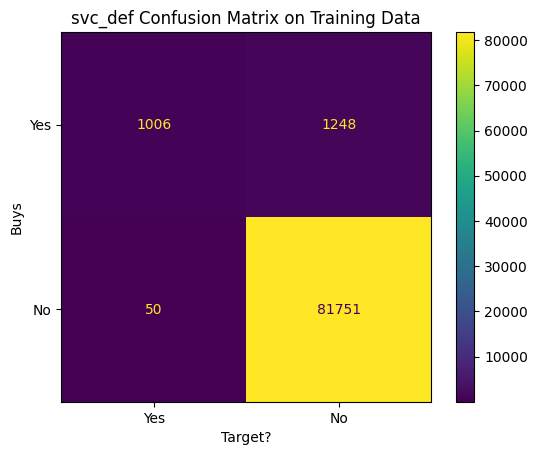

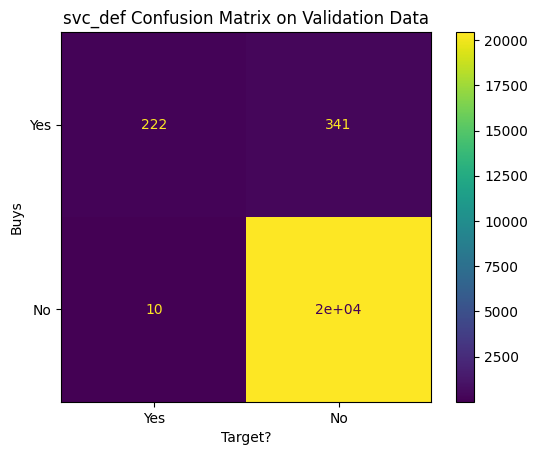

In [ ]:
svc_def = support_vectors("svc_def")

much more bias than variance

Default params but with balanced class weights

Results for svc_balanced
   On Training Data:
     Accuracy: % 93.204
     Precision: % 27.98
     Recall: % 97.471
     F4 Score: % 85.046
     F10 Score: % 95.132
   On Validation Data:
     Accuracy: % 92.957
     Precision: % 26.902
     Recall: % 94.849
     F4 Score: % 75.723
     F10 Score: % 92.535

   Generalization Losses:
     Accuracy: % 0.247
     Precision: % 1.078
     Recall: % 2.622
     F4: % 2.467
     F10: % 2.597

   Confusion Matrices

     Training:
[[ 2197    57]
 [ 5655 76146]]

     Validation:
[[  534    29]
 [ 1451 19000]]


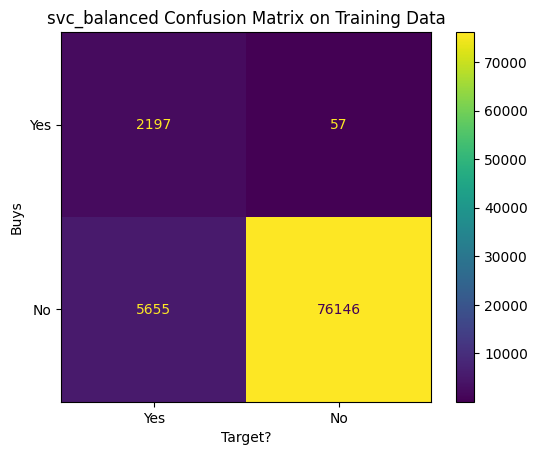

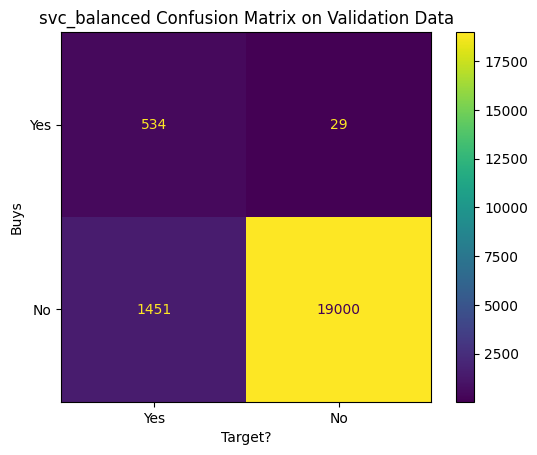

In [ ]:
svc_balanced = support_vectors("svc_balanced", class_weight='balanced')

trying more selective featureset X2

Results for svc2
   On Training Data:
     Accuracy: % 94.995
     Precision: % 34.62
     Recall: % 97.516
     F4 Score: % 88.1
     F10 Score: % 95.792
   On Validation Data:
     Accuracy: % 95.065
     Precision: % 34.847
     Recall: % 96.803
     F4 Score: % 82.19
     F10 Score: % 95.128

   Generalization Losses:
     Accuracy: % -0.07
     Precision: % -0.227
     Recall: % 0.713
     F4: % 0.463
     F10: % 0.664

   Confusion Matrices

     Training:
[[ 2198    56]
 [ 4151 77650]]

     Validation:
[[  545    18]
 [ 1019 19432]]


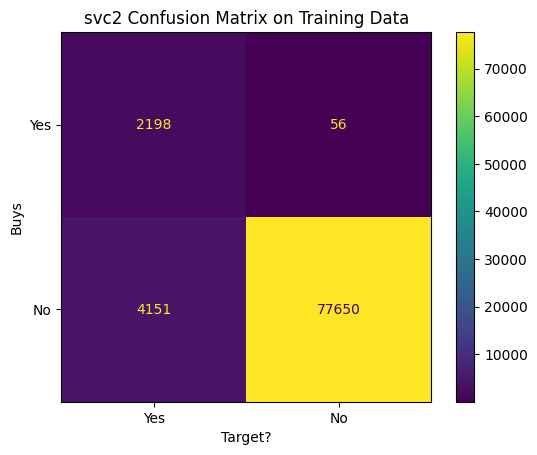

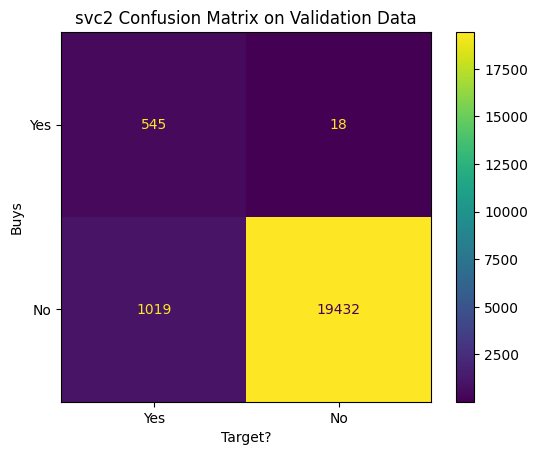

In [ ]:
svc2 = support_vectors("svc2", X_train=X2_train, X_val=X2_val, class_weight='balanced')

Results for svc2a
   On Training Data:
     Accuracy: % 95.435
     Precision: % 36.775
     Recall: % 97.649
     F4 Score: % 88.984
     F10 Score: % 96.074
   On Validation Data:
     Accuracy: % 95.446
     Precision: % 36.725
     Recall: % 96.803
     F4 Score: % 83.193
     F10 Score: % 95.26

   Generalization Losses:
     Accuracy: % -0.011
     Precision: % 0.05
     Recall: % 0.846
     F4: % 0.679
     F10: % 0.814

   Confusion Matrices

     Training:
[[ 2201    53]
 [ 3784 78017]]

     Validation:
[[  545    18]
 [  939 19512]]


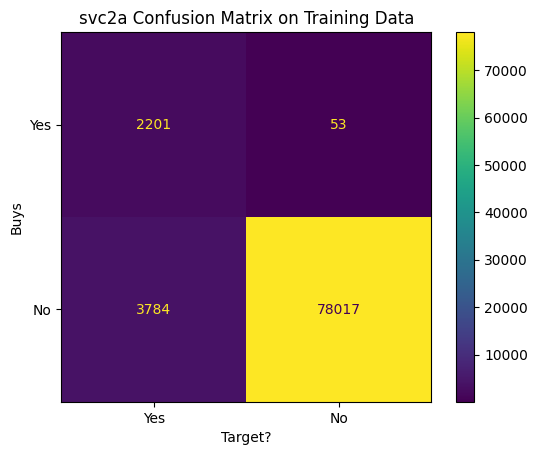

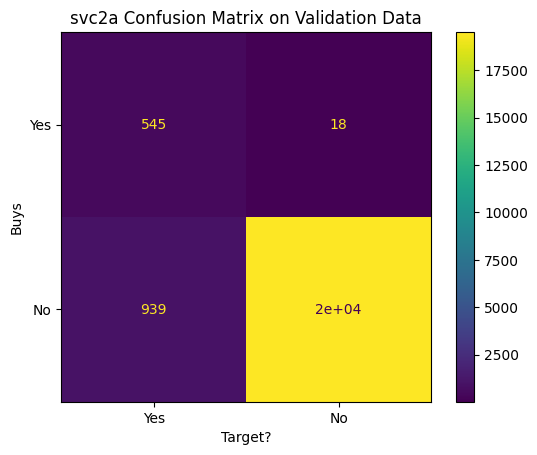

In [ ]:
svc2a = support_vectors("svc2a", X_train=X2_train, X_val=X2_val, C=2.0, class_weight='balanced')

Results for svc2b
   On Training Data:
     Accuracy: % 96.302
     Precision: % 41.891
     Recall: % 97.87
     F4 Score: % 90.738
     F10 Score: % 96.592
   On Validation Data:
     Accuracy: % 96.164
     Precision: % 40.872
     Recall: % 96.625
     F4 Score: % 85.027
     F10 Score: % 95.338

   Generalization Losses:
     Accuracy: % 0.138
     Precision: % 1.02
     Recall: % 1.245
     F4: % 1.29
     F10: % 1.255

   Confusion Matrices

     Training:
[[ 2206    48]
 [ 3060 78741]]

     Validation:
[[  544    19]
 [  787 19664]]


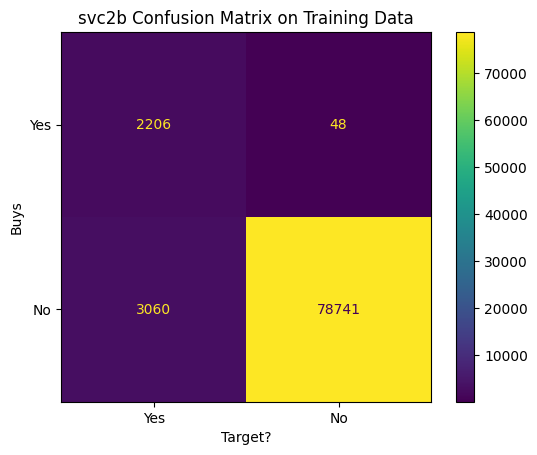

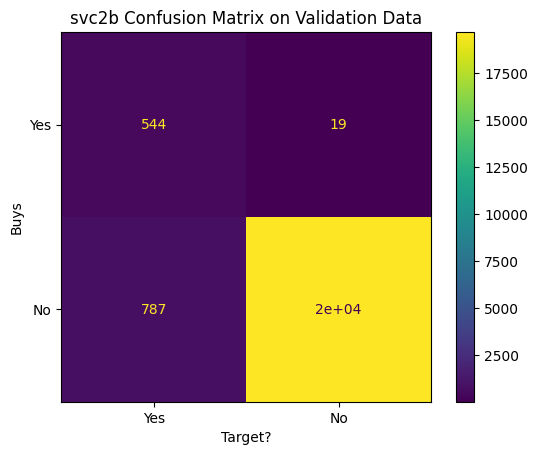

In [ ]:
svc2b = support_vectors("svc2b", X_train=X2_train, X_val=X2_val, C=5.0, class_weight='balanced')

Results for svc2c
   On Training Data:
     Accuracy: % 94.513
     Precision: % 32.533
     Recall: % 97.427
     F4 Score: % 87.196
     F10 Score: % 95.54
   On Validation Data:
     Accuracy: % 94.57
     Precision: % 32.632
     Recall: % 96.448
     F4 Score: % 80.672
     F10 Score: % 94.616

   Generalization Losses:
     Accuracy: % -0.057
     Precision: % -0.099
     Recall: % 0.979
     F4: % 0.698
     F10: % 0.924

   Confusion Matrices

     Training:
[[ 2196    58]
 [ 4554 77247]]

     Validation:
[[  543    20]
 [ 1121 19330]]


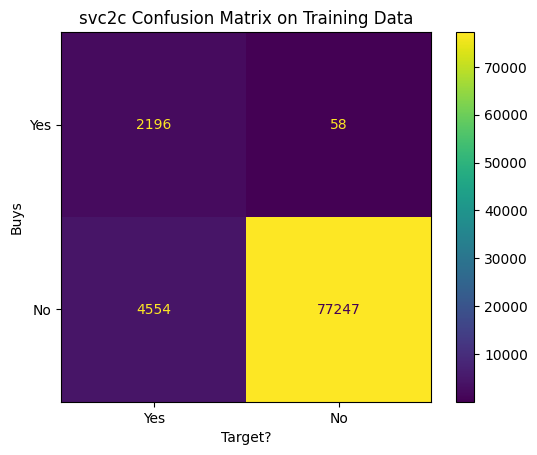

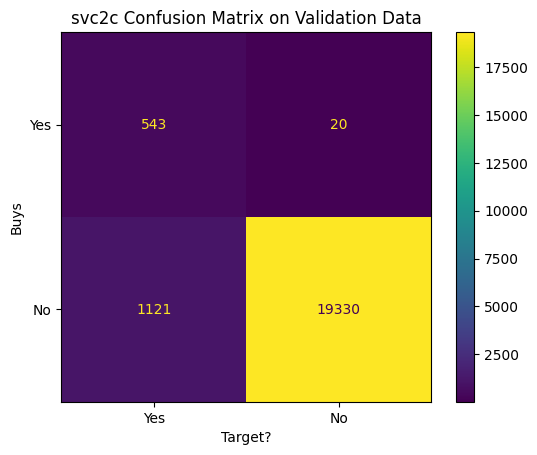

In [ ]:
svc2c = support_vectors("svc2c", X_train=X2_train, X_val=X2_val, C=0.5, class_weight='balanced')

Results for svc2d
   On Training Data:
     Accuracy: % 93.273
     Precision: % 28.155
     Recall: % 97.205
     F4 Score: % 84.95
     F10 Score: % 94.901
   On Validation Data:
     Accuracy: % 93.1
     Precision: % 27.544
     Recall: % 96.625
     F4 Score: % 77.251
     F10 Score: % 94.284

   Generalization Losses:
     Accuracy: % 0.174
     Precision: % 0.61
     Recall: % 0.58
     F4: % 0.747
     F10: % 0.617

   Confusion Matrices

     Training:
[[ 2191    63]
 [ 5591 76210]]

     Validation:
[[  544    19]
 [ 1431 19020]]


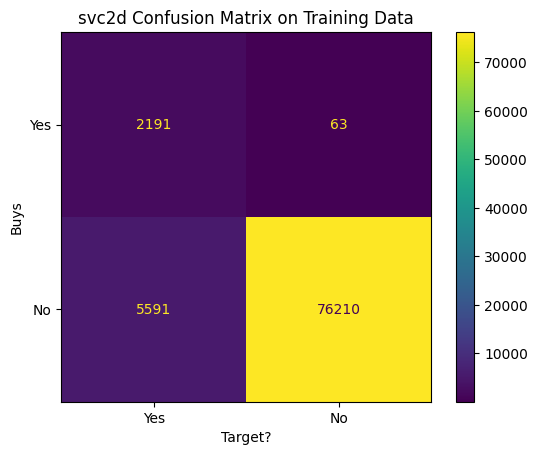

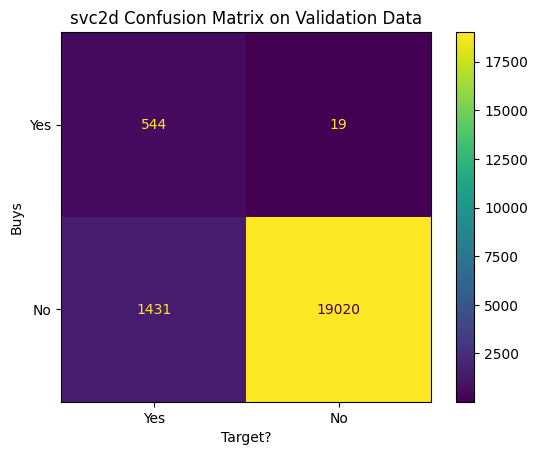

In [ ]:
svc2d = support_vectors("svc2d", X_train=X2_train, X_val=X2_val, C=0.1, class_weight='balanced')

Tuning C, fitting to X

Results for svc3
   On Training Data:
     Accuracy: % 93.877
     Precision: % 30.188
     Recall: % 97.782
     F4 Score: % 86.401
     F10 Score: % 95.661
   On Validation Data:
     Accuracy: % 93.514
     Precision: % 28.471
     Recall: % 93.961
     F4 Score: % 76.39
     F10 Score: % 91.869

   Generalization Losses:
     Accuracy: % 0.363
     Precision: % 1.716
     Recall: % 3.821
     F4: % 3.639
     F10: % 3.792

   Confusion Matrices

     Training:
[[ 2204    50]
 [ 5097 76704]]

     Validation:
[[  529    34]
 [ 1329 19122]]


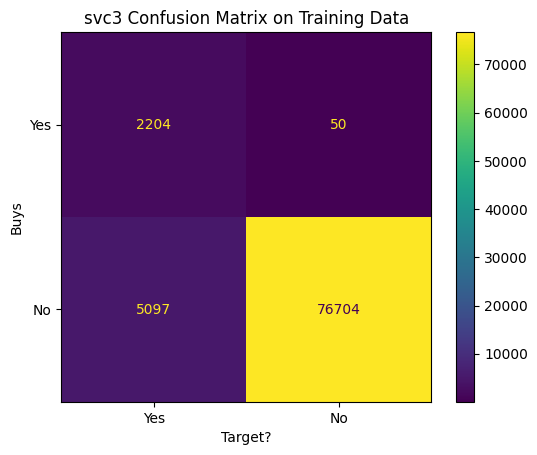

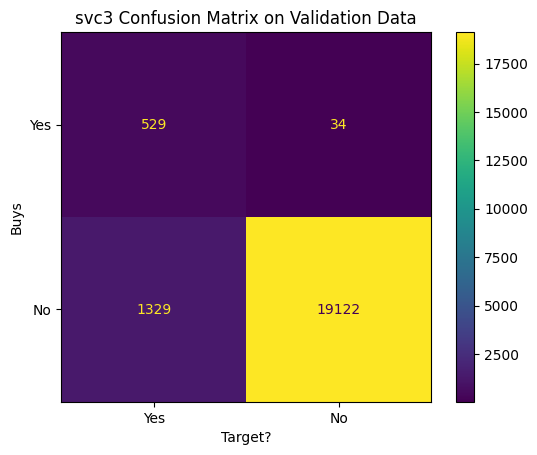

In [ ]:
svc3 = support_vectors("svc3", C=2.0, class_weight='balanced')

In [ ]:
svc3a = support_vectors("svc3a", C=5.0, class_weight='balanced')

KeyboardInterrupt: 

In [ ]:
svc3b = support_vectors("svc3b", C=0.5, class_weight='balanced')

taking svc2a params and tuning gamma

In [ ]:
svc2a.gamma

In [ ]:
svc4 = support_vectors("svc4", X_train=X2_train, X_val=X2_val, gamma='auto', C=2.0, class_weight='balanced')

In [ ]:
svc4a = support_vectors("svc4a", X_train=X2_train, X_val=X2_val, gamma=0.1, C=2.0, class_weight='balanced')

In [ ]:
svc4b = support_vectors("svc4b", X_train=X2_train, X_val=X2_val, gamma=0.01, C=2.0, class_weight='balanced')

In [ ]:
svc4c = support_vectors("svc4c", X_train=X2_train, X_val=X2_val, gamma=0.5, C=2.0, class_weight='balanced')

taking svc2b's params and tuning kernel

In [ ]:
svc5 = support_vectors("svc5", X_train=X2_train, X_val=X2_val, C=5.0, kernel='sigmoid', class_weight='balanced')

svc5a: linear kernel (appears to be prohibitively computationally expensive with these params)

In [ ]:
#svc5a = support_vectors("svc5a", X_train=X2_train, X_val=X2_val, C=0.1, kernel='linear', class_weight='balanced')

svc5b: trying poly

In [ ]:
svc5b = support_vectors("svc5b", X_train=X2_train, X_val=X2_val, C=0.1, kernel='poly', class_weight='balanced')

Trying out the poly kernel with different parameters and X

In [ ]:
svc6 = support_vectors("svc6", kernel='poly', class_weight='balanced')

In [ ]:
svc6_X2 = support_vectors("svc6_X2", X_train=X2_train, X_val=X2_val, kernel='poly', class_weight='balanced')

Combining parameters for most sensitive models

In [ ]:
svc6a = support_vectors("svc6a", X_train=X2_train, X_val=X2_val, C=2.0, gamma=0.01, kernel='poly', class_weight='balanced')

svc6b: fiddling with degree

In [ ]:
svc6b = support_vectors("svc6b", X_train=X2_train, X_val=X2_val, C=0.1, kernel='poly', degree=4, class_weight='balanced')

Results for svc6c
   On Training Data:
     Accuracy: % 79.836
     Precision: % 11.63
     Recall: % 98.802
     F4 Score: % 68.569
     F10 Score: % 91.976
   On Validation Data:
     Accuracy: % 79.918
     Precision: % 11.626
     Recall: % 98.401
     F4 Score: % 56.347
     F10 Score: % 91.63

   Generalization Losses:
     Accuracy: % -0.082
     Precision: % 0.003
     Recall: % 0.401
     F4: % 0.189
     F10: % 0.346

   Confusion Matrices

     Training:
[[ 2227    27]
 [16922 64879]]

     Validation:
[[  554     9]
 [ 4211 16240]]


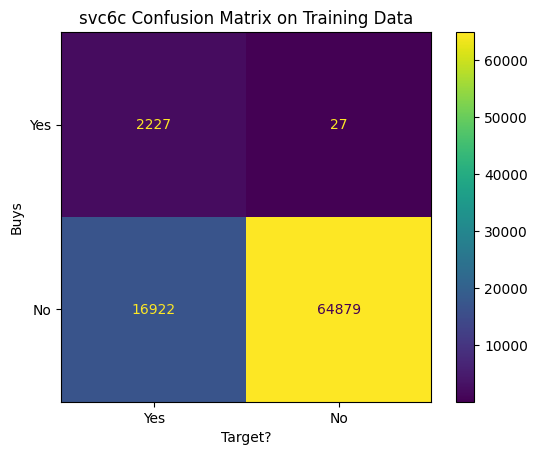

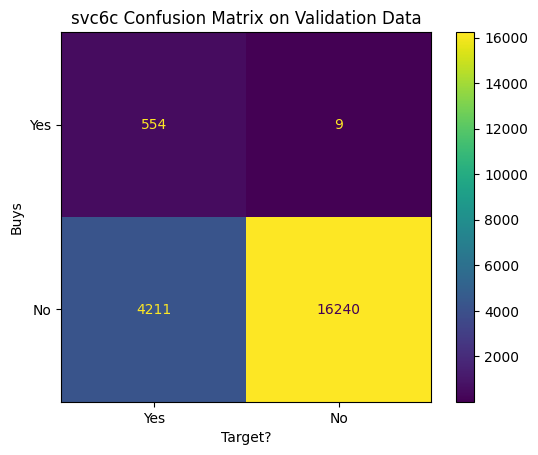

In [ ]:
svc6c = support_vectors("svc6c", X_train=X2_train, X_val=X2_val, C=0.1, kernel='poly', degree=5, class_weight='balanced')

Results for svc6d
   On Training Data:
     Accuracy: % 80.268
     Precision: % 11.883
     Recall: % 99.113
     F4 Score: % 69.222
     F10 Score: % 92.397
   On Validation Data:
     Accuracy: % 80.218
     Precision: % 11.668
     Recall: % 97.158
     F4 Score: % 56.074
     F10 Score: % 90.587

   Generalization Losses:
     Accuracy: % 0.05
     Precision: % 0.215
     Recall: % 1.955
     F4: % 1.326
     F10: % 1.811

   Confusion Matrices

     Training:
[[ 2234    20]
 [16566 65235]]

     Validation:
[[  547    16]
 [ 4141 16310]]


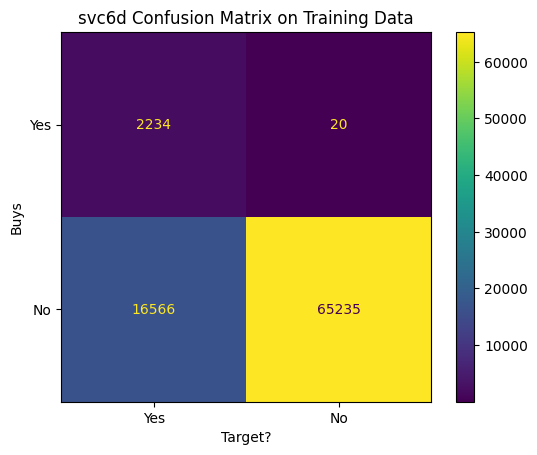

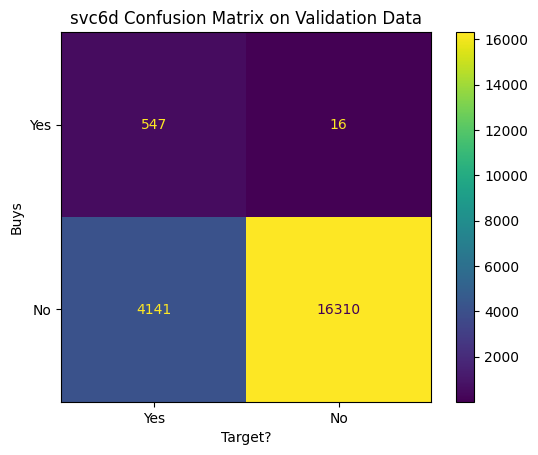

In [ ]:
svc6d = support_vectors("svc6d", X_train=X2_train, X_val=X2_val, C=0.1, kernel='poly', degree=6, class_weight='balanced')

svc7: taking svc6c's parameters and tuning gamma

Results for svc7
   On Training Data:
     Accuracy: % 79.394
     Precision: % 11.401
     Recall: % 98.713
     F4 Score: % 68.055
     F10 Score: % 91.756
   On Validation Data:
     Accuracy: % 79.495
     Precision: % 11.413
     Recall: % 98.401
     F4 Score: % 55.841
     F10 Score: % 91.497

   Generalization Losses:
     Accuracy: % -0.1
     Precision: % -0.012
     Recall: % 0.312
     F4: % 0.114
     F10: % 0.259

   Confusion Matrices

     Training:
[[ 2225    29]
 [17291 64510]]

     Validation:
[[  554     9]
 [ 4300 16151]]


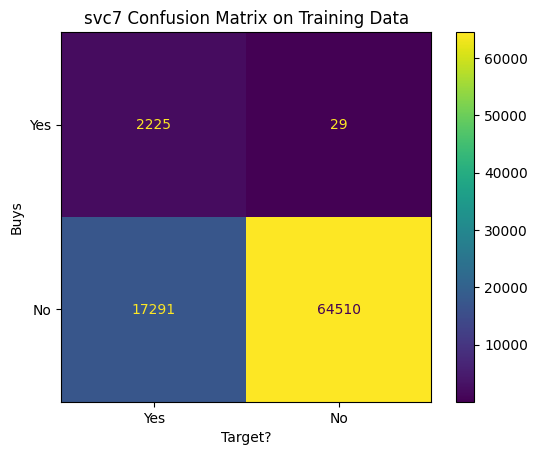

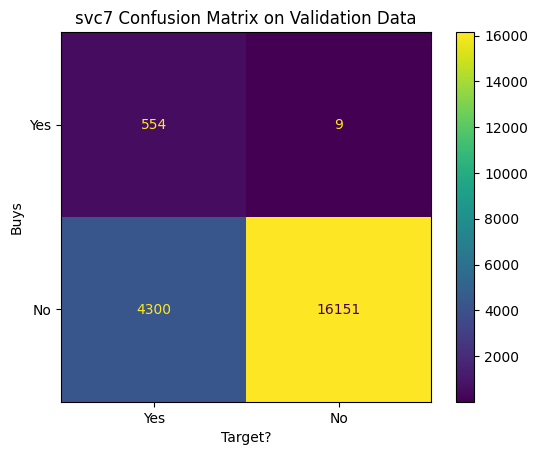

In [ ]:
svc7 = support_vectors("svc7", X_train=X2_train, X_val=X2_val, C=0.1, gamma=0.01, kernel='poly', degree=5, class_weight='balanced')

svc7a: trying gamme=0.05. (note that tuning gamma above 0.01 appears to incur additional computational expense)

Results for svc7a
   On Training Data:
     Accuracy: % 76.178
     Precision: % 10.024
     Recall: % 98.846
     F4 Score: % 64.979
     F10 Score: % 90.874
   On Validation Data:
     Accuracy: % 75.902
     Precision: % 9.92
     Recall: % 98.934
     F4 Score: % 52.144
     F10 Score: % 90.862

   Generalization Losses:
     Accuracy: % 0.276
     Precision: % 0.104
     Recall: % -0.088
     F4: % 0.224
     F10: % 0.012

   Confusion Matrices

     Training:
[[ 2228    26]
 [19998 61803]]

     Validation:
[[  557     6]
 [ 5058 15393]]


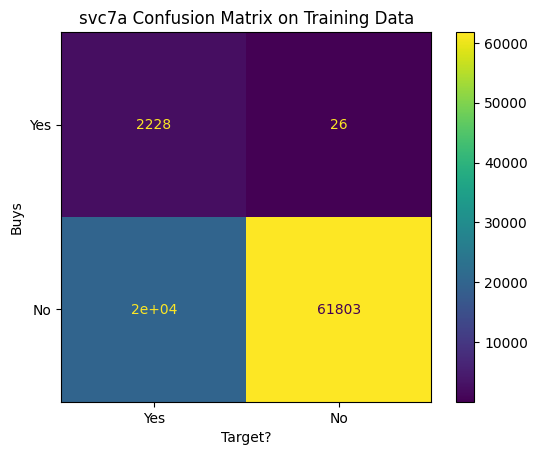

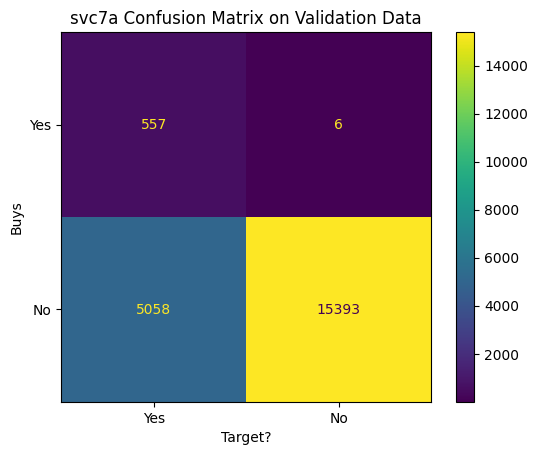

In [ ]:
svc7a = support_vectors("svc7a", X_train=X2_train, X_val=X2_val, C=0.1, gamma=0.005, kernel='poly', degree=5, class_weight='balanced')

svc8: tuning C (note that raising C incurs additional computational expense, takes about 10m to compute.)

Results for svc8
   On Training Data:
     Accuracy: % 82.063
     Precision: % 12.868
     Recall: % 98.58
     F4 Score: % 70.829
     F10 Score: % 92.481
   On Validation Data:
     Accuracy: % 82.088
     Precision: % 12.718
     Recall: % 96.98
     F4 Score: % 58.333
     F10 Score: % 91.011

   Generalization Losses:
     Accuracy: % -0.025
     Precision: % 0.15
     Recall: % 1.6
     F4: % 1.045
     F10: % 1.471

   Confusion Matrices

     Training:
[[ 2222    32]
 [15045 66756]]

     Validation:
[[  546    17]
 [ 3747 16704]]


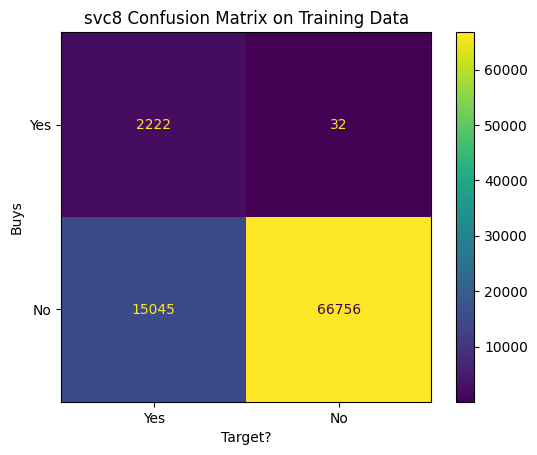

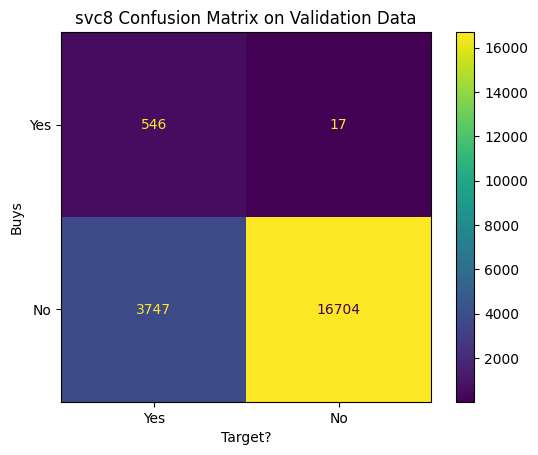

In [ ]:
svc8 = support_vectors("svc8", X_train=X2_train, X_val=X2_val, C=2.0, gamma=0.01, kernel='poly', degree=5, class_weight='balanced')

Results for svc8a
   On Training Data:
     Accuracy: % 80.765
     Precision: % 12.116
     Recall: % 98.713
     F4 Score: % 69.495
     F10 Score: % 92.19
   On Validation Data:
     Accuracy: % 80.779
     Precision: % 11.969
     Recall: % 97.158
     F4 Score: % 56.76
     F10 Score: % 90.762

   Generalization Losses:
     Accuracy: % -0.015
     Precision: % 0.147
     Recall: % 1.555
     F4: % 1.01
     F10: % 1.427

   Confusion Matrices

     Training:
[[ 2225    29]
 [16139 65662]]

     Validation:
[[  547    16]
 [ 4023 16428]]


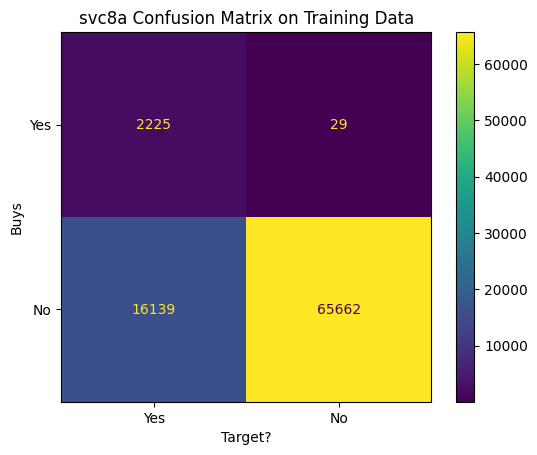

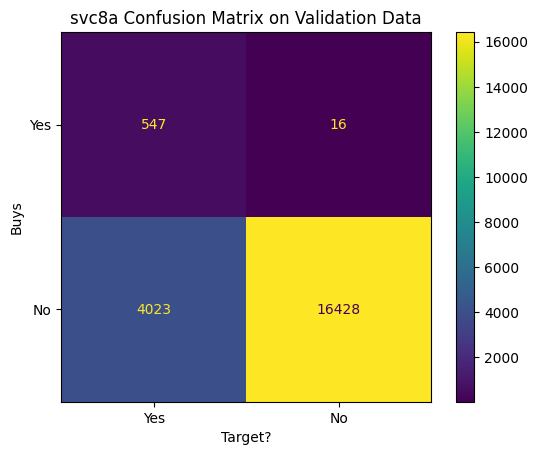

In [ ]:
svc8a = support_vectors("svc8a", X_train=X2_train, X_val=X2_val, C=0.5, gamma=0.01, kernel='poly', degree=5, class_weight='balanced')

Results for svc8b
   On Training Data:
     Accuracy: % 78.684
     Precision: % 11.074
     Recall: % 98.846
     F4 Score: % 67.415
     F10 Score: % 91.654
   On Validation Data:
     Accuracy: % 78.757
     Precision: % 11.076
     Recall: % 98.579
     F4 Score: % 55.07
     F10 Score: % 91.427

   Generalization Losses:
     Accuracy: % -0.073
     Precision: % -0.002
     Recall: % 0.267
     F4: % 0.114
     F10: % 0.227

   Confusion Matrices

     Training:
[[ 2228    26]
 [17891 63910]]

     Validation:
[[  555     8]
 [ 4456 15995]]


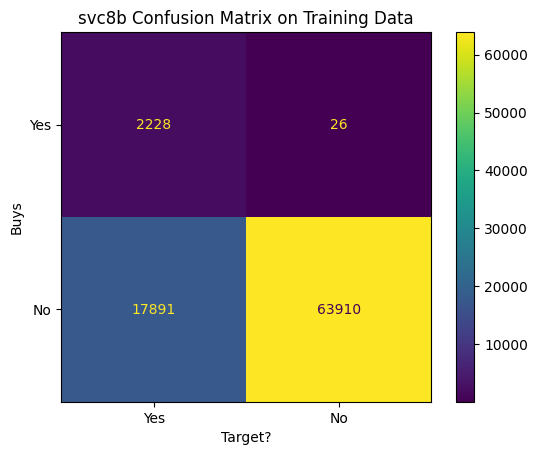

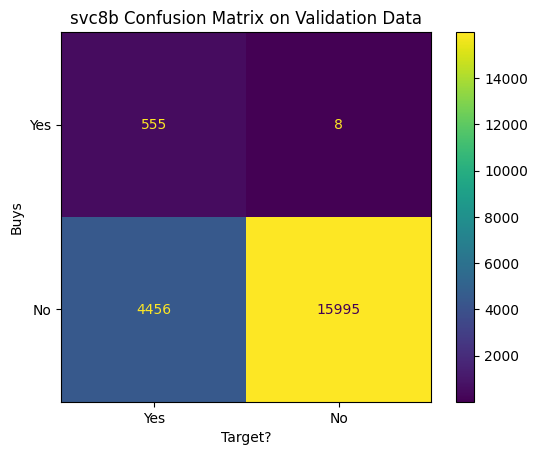

In [ ]:
svc8b = support_vectors("svc8b", X_train=X2_train, X_val=X2_val, C=0.05, gamma=0.01, kernel='poly', degree=5, class_weight='balanced')

trying same model with more features (X)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Results for svc8b_X
   On Training Data:
     Accuracy: % 97.318
     Precision: % 0.0
     Recall: % 0.0
     F4 Score: % 0.0
     F10 Score: % 0.0
   On Validation Data:
     Accuracy: % 97.321
     Precision: % 0.0
     Recall: % 0.0
     F4 Score: % 0.0
     F10 Score: % 0.0

   Generalization Losses:
     Accuracy: % -0.002
     Precision: % 0.0
     Recall: % 0.0
     F4: % 0.0
     F10: % 0.0

   Confusion Matrices

     Training:
[[    0  2254]
 [    0 81801]]

     Validation:
[[    0   563]
 [    0 20451]]


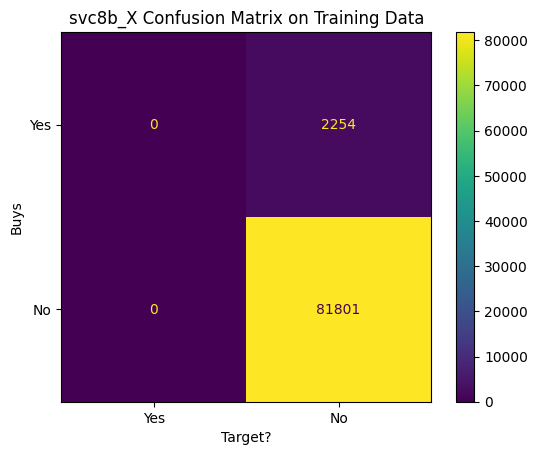

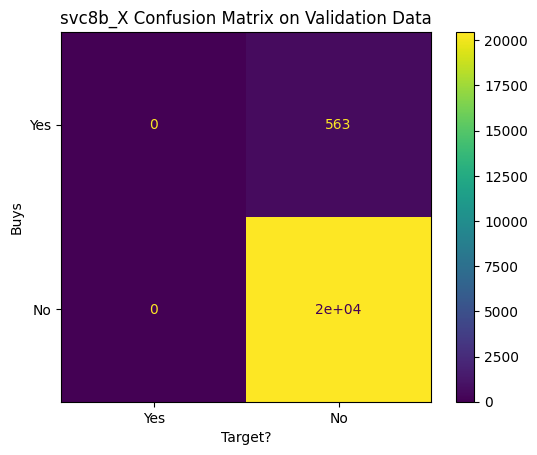

In [ ]:
#svc8b_X = support_vectors("svc8b_X", C=0.05, gamma=0.01, kernel='poly', degree=5, class_weight='balanced')

Results for svc8c
   On Training Data:
     Accuracy: % 77.368
     Precision: % 10.504
     Recall: % 98.935
     F4 Score: % 66.169
     F10 Score: % 91.323
   On Validation Data:
     Accuracy: % 77.191
     Precision: % 10.393
     Recall: % 98.579
     F4 Score: % 53.329
     F10 Score: % 90.939

   Generalization Losses:
     Accuracy: % 0.177
     Precision: % 0.111
     Recall: % 0.356
     F4: % 0.41
     F10: % 0.384

   Confusion Matrices

     Training:
[[ 2230    24]
 [18999 62802]]

     Validation:
[[  555     8]
 [ 4785 15666]]


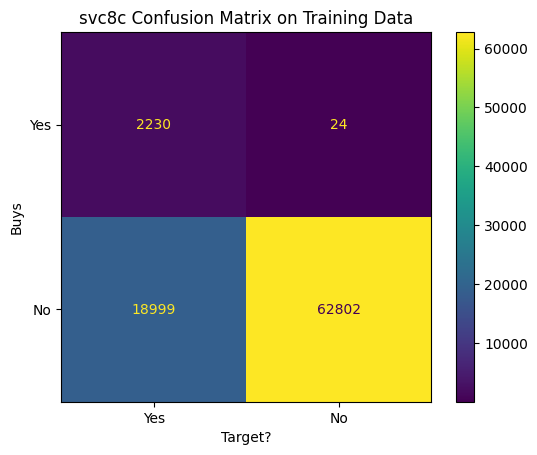

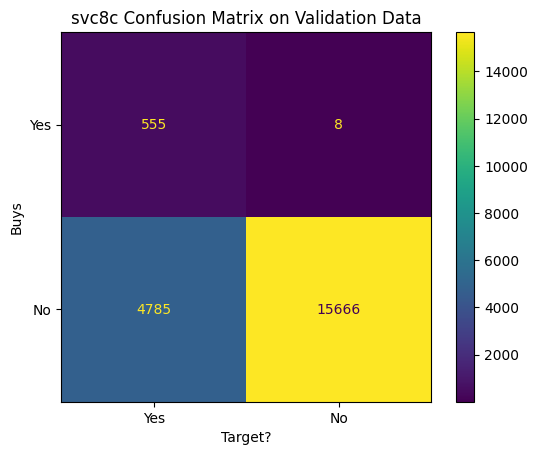

In [ ]:
svc8c = support_vectors("svc8c", X_train=X2_train, X_val=X2_val, C=0.01, gamma=0.01, kernel='poly', degree=5, class_weight='balanced')

svc9: back to tuning gamma with svc8b's parameters. Trying gamma=0.005.

Results for svc9
   On Training Data:
     Accuracy: % 75.487
     Precision: % 9.766
     Recall: % 98.802
     F4 Score: % 64.312
     F10 Score: % 90.622
   On Validation Data:
     Accuracy: % 75.231
     Precision: % 9.677
     Recall: % 98.934
     F4 Score: % 51.464
     F10 Score: % 90.655

   Generalization Losses:
     Accuracy: % 0.257
     Precision: % 0.089
     Recall: % -0.132
     F4: % 0.176
     F10: % -0.033

   Confusion Matrices

     Training:
[[ 2227    27]
 [20577 61224]]

     Validation:
[[  557     6]
 [ 5199 15252]]


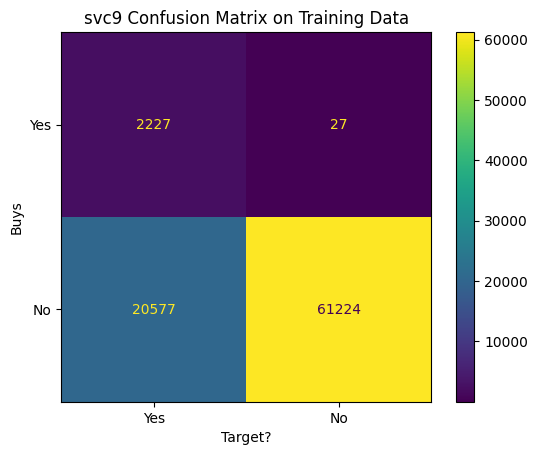

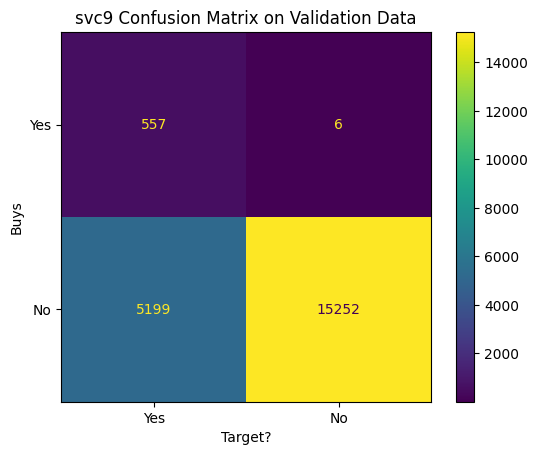

In [ ]:
svc9 = support_vectors("svc9", X_train=X2_train, X_val=X2_val, C=0.05, gamma=0.005, kernel='poly', degree=5, class_weight='balanced')

a: pushing gamma even lower to 0.001

Results for svc9a
   On Training Data:
     Accuracy: % 60.676
     Precision: % 6.344
     Recall: % 99.29
     F4 Score: % 53.331
     F10 Score: % 86.712
   On Validation Data:
     Accuracy: % 60.374
     Precision: % 6.294
     Recall: % 99.29
     F4 Score: % 40.075
     F10 Score: % 86.617

   Generalization Losses:
     Accuracy: % 0.302
     Precision: % 0.051
     Recall: % 0.001
     F4: % 0.211
     F10: % 0.095

   Confusion Matrices

     Training:
[[ 2238    16]
 [33038 48763]]

     Validation:
[[  559     4]
 [ 8323 12128]]


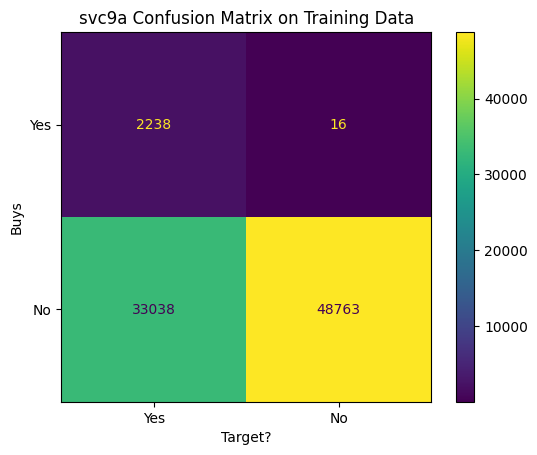

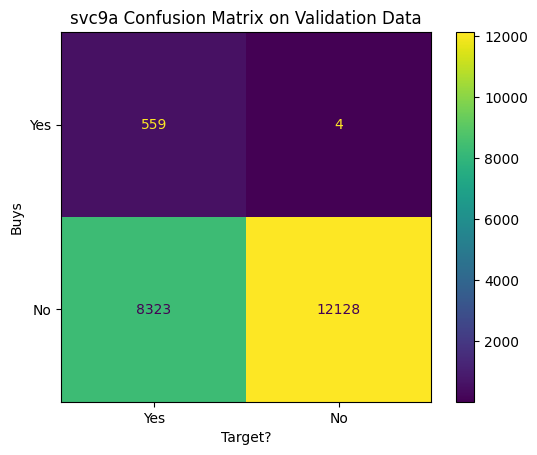

In [ ]:
svc9a = support_vectors("svc9a", X_train=X2_train, X_val=X2_val, C=0.05, gamma=0.001, kernel='poly', degree=5, class_weight='balanced')

GridSearch impractical even with narrow ranges

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import make_scorer

# f10_score = make_scorer(fbeta_score, beta=10)

# f10_rbf_grid = {
#     'C': np.arange(1.5, 4.5, 0.5),
#     'gamma': [0.01, 'scale']
# }

# svc_rbf = SVC(class_weight='balanced')

# svc_rbf_f10_opt = GridSearchCV(svc_rbf, f10_rbf_grid, scoring=f10_score, verbose=1)
# svc_rbf_f10_opt.fit(X_train, y_train)
# svc_rbf_10_opt.best_params_

### 9. Assess Model Performance

In [ ]:
val_FNs = []
val_FPs = []

for cm in cm_val_list:
  val_FNs.append(cm[0][1])
  val_FPs.append(cm[1][0])

In [ ]:
SVC_eval = pd.DataFrame({
    'Model': model_names_list,
    'Class Weight': weights,
    'C': C_list,
    'Kernel': kernels,
    'Degree': degrees,
    'Gamma': gammas,
    'Class Weight': weights,
    'Train Accuracy': training_accuracy_list,
    'Train Precision': training_precision_list,
    'Train Recall': training_recall_list,
    'Train F4': training_f4_list,
    'Train F10': training_f10_list,
    'Validation FNs': val_FNs,
    'Validation FPs': val_FPs,
    'Validation Accuracy': validation_accuracy_list,
    'Validation Precision': validation_precision_list,
    'Validation Recall': validation_recall_list,
    'Validation F4': validation_f4_list,
    'Validation F10': validation_f10_list,
    'Accuracy Generalization Loss': accuracy_losses_list,
    'Precision Generalization Loss': precision_losses_list,
    'Recall Generalization Loss': recall_losses_list,
    'F4 Generalization Loss': f4_losses_list,
    'F10 Generalization Loss': f10_losses_list
})

SVC_eval.fillna("None", inplace=True)

In [ ]:
SVCs_by_recall = SVC_eval.sort_values('Validation Recall', ascending=False)
SVCs_by_F4 = SVC_eval.sort_values('Validation F4', ascending=False)
SVCs_by_F10 = SVC_eval.sort_values('Validation F10', ascending=False)
SVCs_by_precision = SVC_eval.sort_values('Validation Precision', ascending=False)

if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,

.var() returns unbiased variance over requested axis.

In [ ]:
X_var = X_train.var()
X_n_features = len(X_train.columns)
X_train_gammascale = 1 / (X_n_features * X_var)

X2_var = X2_train.var()
X2_n_features = len(X2_train.columns)
X2_train_gammascale = 1 / (X2_n_features * X_var)

print(X_train_gammascale)
print(X2_train_gammascale)

age_of_vehicle_years            0.294530
sched_serv_warr                 0.285926
non_sched_serv_warr             0.289471
sched_serv_paid                 0.285623
non_sched_serv_paid             0.287588
total_paid_services             0.286215
total_services                  0.288439
mth_since_last_serv             0.290975
annualised_mileage              0.292082
num_dealers_visited             0.287888
num_serv_dealer_purchased       0.289844
car_model_model_1               0.284123
car_model_model_10              1.225019
car_model_model_11              5.943856
car_model_model_12              6.552438
car_model_model_13              5.474894
car_model_model_14             50.482010
car_model_model_15             12.147995
car_model_model_16             32.991791
car_model_model_17             26.052355
car_model_model_18             46.674269
car_model_model_19           1236.117647
car_model_model_2               0.151731
car_model_model_3               0.260884
car_model_model_

In [ ]:
SVCs_by_recall

,Model,Class Weight,C,Kernel,Degree,Gamma,Train Accuracy,Train Precision,Train Recall,Train F4,...,Validation Accuracy,Validation Precision,Validation Recall,Validation F4,Validation F10,Accuracy Generalization Loss,Precision Generalization Loss,Recall Generalization Loss,F4 Generalization Loss,F10 Generalization Loss
1,svc9a,balanced,0.05,poly,5.0,0.001,0.606757,0.063443,0.992902,0.533305,...,0.603740,0.062936,0.992895,0.531191,0.866175,0.003017,0.000506,0.000006,0.002115,0.000948
2,svc9,balanced,0.05,poly,5.0,0.005,0.754875,0.097658,0.988021,0.643117,...,0.752308,0.096769,0.989343,0.641357,0.906552,0.002567,0.000890,-0.001322,0.001759,-0.000334
3,svc8b,balanced,0.05,poly,5.0,0.01,0.786842,0.110741,0.988465,0.674154,...,0.787570,0.110756,0.985790,0.673015,0.914273,-0.000728,-0.000015,0.002675,0.001139,0.002267
4,svc7,balanced,0.1,poly,5.0,0.01,0.793944,0.114009,0.987134,0.680551,...,0.794946,0.114133,0.984014,0.679411,0.914969,-0.001002,-0.000124,0.003120,0.001139,0.002591
5,svc6c,balanced,0.1,poly,5.0,scale,0.798358,0.116299,0.988021,0.685690,...,0.799181,0.116264,0.984014,0.683802,0.916302,-0.000823,0.000034,0.004007,0.001888,0.003460
0,Baseline,None,None,None,None,None,0.973184,0.000000,0.000000,0.000000,...,0.973208,0.000000,0.000000,0.000000,0.000000,-0.000024,0.000000,0.000000,0.000000,0.000000


In [ ]:
SVCs_by_F4

,Model,Class Weight,C,Kernel,Degree,Gamma,Train Accuracy,Train Precision,Train Recall,Train F4,...,Validation Accuracy,Validation Precision,Validation Recall,Validation F4,Validation F10,Accuracy Generalization Loss,Precision Generalization Loss,Recall Generalization Loss,F4 Generalization Loss,F10 Generalization Loss
5,svc6c,balanced,0.1,poly,5.0,scale,0.798358,0.116299,0.988021,0.685690,...,0.799181,0.116264,0.984014,0.683802,0.916302,-0.000823,0.000034,0.004007,0.001888,0.003460
4,svc7,balanced,0.1,poly,5.0,0.01,0.793944,0.114009,0.987134,0.680551,...,0.794946,0.114133,0.984014,0.679411,0.914969,-0.001002,-0.000124,0.003120,0.001139,0.002591
3,svc8b,balanced,0.05,poly,5.0,0.01,0.786842,0.110741,0.988465,0.674154,...,0.787570,0.110756,0.985790,0.673015,0.914273,-0.000728,-0.000015,0.002675,0.001139,0.002267
2,svc9,balanced,0.05,poly,5.0,0.005,0.754875,0.097658,0.988021,0.643117,...,0.752308,0.096769,0.989343,0.641357,0.906552,0.002567,0.000890,-0.001322,0.001759,-0.000334
1,svc9a,balanced,0.05,poly,5.0,0.001,0.606757,0.063443,0.992902,0.533305,...,0.603740,0.062936,0.992895,0.531191,0.866175,0.003017,0.000506,0.000006,0.002115,0.000948
0,Baseline,None,None,None,None,None,0.973184,0.000000,0.000000,0.000000,...,0.973208,0.000000,0.000000,0.000000,0.000000,-0.000024,0.000000,0.000000,0.000000,0.000000


In [ ]:
SVCs_by_F10

,Model,Class Weight,C,Kernel,Degree,Gamma,Train Accuracy,Train Precision,Train Recall,Train F4,...,Validation Accuracy,Validation Precision,Validation Recall,Validation F4,Validation F10,Accuracy Generalization Loss,Precision Generalization Loss,Recall Generalization Loss,F4 Generalization Loss,F10 Generalization Loss
5,svc6c,balanced,0.1,poly,5.0,scale,0.798358,0.116299,0.988021,0.685690,...,0.799181,0.116264,0.984014,0.683802,0.916302,-0.000823,0.000034,0.004007,0.001888,0.003460
4,svc7,balanced,0.1,poly,5.0,0.01,0.793944,0.114009,0.987134,0.680551,...,0.794946,0.114133,0.984014,0.679411,0.914969,-0.001002,-0.000124,0.003120,0.001139,0.002591
3,svc8b,balanced,0.05,poly,5.0,0.01,0.786842,0.110741,0.988465,0.674154,...,0.787570,0.110756,0.985790,0.673015,0.914273,-0.000728,-0.000015,0.002675,0.001139,0.002267
2,svc9,balanced,0.05,poly,5.0,0.005,0.754875,0.097658,0.988021,0.643117,...,0.752308,0.096769,0.989343,0.641357,0.906552,0.002567,0.000890,-0.001322,0.001759,-0.000334
1,svc9a,balanced,0.05,poly,5.0,0.001,0.606757,0.063443,0.992902,0.533305,...,0.603740,0.062936,0.992895,0.531191,0.866175,0.003017,0.000506,0.000006,0.002115,0.000948
0,Baseline,None,None,None,None,None,0.973184,0.000000,0.000000,0.000000,...,0.973208,0.000000,0.000000,0.000000,0.000000,-0.000024,0.000000,0.000000,0.000000,0.000000


In [ ]:
SVCs_by_precision

,Model,Class Weight,C,Kernel,Degree,Gamma,Train Accuracy,Train Precision,Train Recall,Train F4,...,Validation Accuracy,Validation Precision,Validation Recall,Validation F4,Validation F10,Accuracy Generalization Loss,Precision Generalization Loss,Recall Generalization Loss,F4 Generalization Loss,F10 Generalization Loss
5,svc6c,balanced,0.1,poly,5.0,scale,0.798358,0.116299,0.988021,0.685690,...,0.799181,0.116264,0.984014,0.683802,0.916302,-0.000823,0.000034,0.004007,0.001888,0.003460
4,svc7,balanced,0.1,poly,5.0,0.01,0.793944,0.114009,0.987134,0.680551,...,0.794946,0.114133,0.984014,0.679411,0.914969,-0.001002,-0.000124,0.003120,0.001139,0.002591
3,svc8b,balanced,0.05,poly,5.0,0.01,0.786842,0.110741,0.988465,0.674154,...,0.787570,0.110756,0.985790,0.673015,0.914273,-0.000728,-0.000015,0.002675,0.001139,0.002267
2,svc9,balanced,0.05,poly,5.0,0.005,0.754875,0.097658,0.988021,0.643117,...,0.752308,0.096769,0.989343,0.641357,0.906552,0.002567,0.000890,-0.001322,0.001759,-0.000334
1,svc9a,balanced,0.05,poly,5.0,0.001,0.606757,0.063443,0.992902,0.533305,...,0.603740,0.062936,0.992895,0.531191,0.866175,0.003017,0.000506,0.000006,0.002115,0.000948
0,Baseline,None,None,None,None,None,0.973184,0.000000,0.000000,0.000000,...,0.973208,0.000000,0.000000,0.000000,0.000000,-0.000024,0.000000,0.000000,0.000000,0.000000


In [ ]:
SVCs_by_recall.to_csv("SVCs_by_recall_newer")
SVCs_by_precision.to_csv("SVCs_by_precision_newer")
SVCs_by_F4.to_csv("SVCs_by_F4_newer")
SVCs_by_F10.to_csv("SVCs_by_F10_newer")

Testing Phase

In [ ]:
tested_models_list = []
test_C_list = []
test_kernels = []
test_degrees = []
test_gammas = []

test_recall = []
test_precision = []
test_accuracy = []
test_F10 = []
test_cms = []
test_FNs = []
test_FPs = []

Testing svc6c

Metrics for svc6c on test data: 
   Accuracy:  0.803030303030303
   Precision:  0.1171634121274409
   Recall:  0.9715909090909091
   F4:  0.679920477137177
   F10:  0.9061622812770533

Confusion Matrix
[[  684    20]
 [ 5154 20410]]


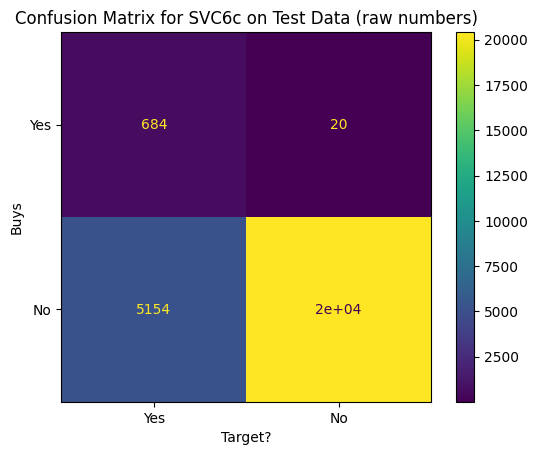

In [ ]:
preds_svc6c_test = svc6c.predict(X2_test)
accuracy_svc6c_test = accuracy_score(y_test, preds_svc6c_test)
precision_svc6c_test = precision_score(y_test, preds_svc6c_test)
recall_svc6c_test = recall_score(y_test, preds_svc6c_test)
f4_svc6c_test = fbeta_score(y_test, preds_svc6c_test, beta=4)
f10_svc6c_test = fbeta_score(y_test, preds_svc6c_test, beta=10)
cm_svc6c_test = confusion_matrix(y_test, preds_svc6c_test, labels=[1, 0])
FNs_svc6c_test = cm_svc6c_test[0, 1]
FPs_svc6c_test = cm_svc6c_test[1, 0]

tested_models_list.append("SVC6c")
test_C_list.append(svc6c.C)
test_gammas.append(svc6c.gamma)

test_recall.append(recall_svc6c_test)
test_precision.append(precision_svc6c_test)
test_accuracy.append(accuracy_svc6c_test)
test_F10.append(f10_svc6c_test)
test_FNs.append(FNs_svc6c_test)
test_FPs.append(FPs_svc6c_test)

print("Metrics for svc6c on test data: ")
print("   Accuracy: ", accuracy_svc6c_test)
print("   Precision: ", precision_svc6c_test)
print("   Recall: ", recall_svc6c_test)
print("   F4: ", f4_svc6c_test)
print("   F10: ", f10_svc6c_test)
print("")
print("Confusion Matrix")
print(cm_svc6c_test)

CM_svc6c_test_raw = ConfusionMatrixDisplay.from_predictions(y_test, preds_svc6c_test, labels=[1, 0])
configure_CM(CM_svc6c_test_raw, "Confusion Matrix for SVC6c on Test Data (raw numbers)")
plt.show()

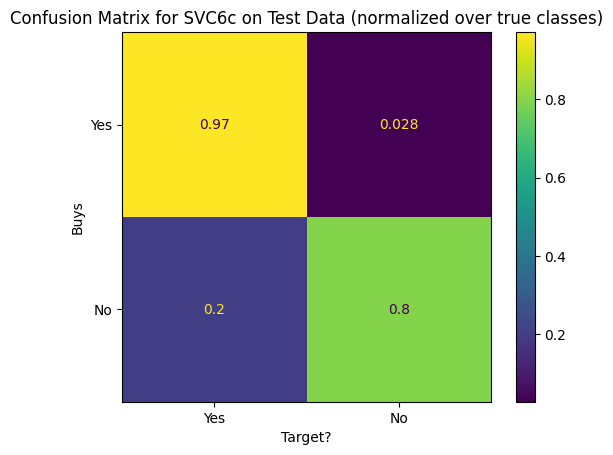

In [ ]:
CM_svc6c_test_true = ConfusionMatrixDisplay.from_predictions(y_test, preds_svc6c_test, normalize='true', labels=[1, 0])
configure_CM(CM_svc6c_test_true, "Confusion Matrix for SVC6c on Test Data (normalized over true classes)")
plt.show()

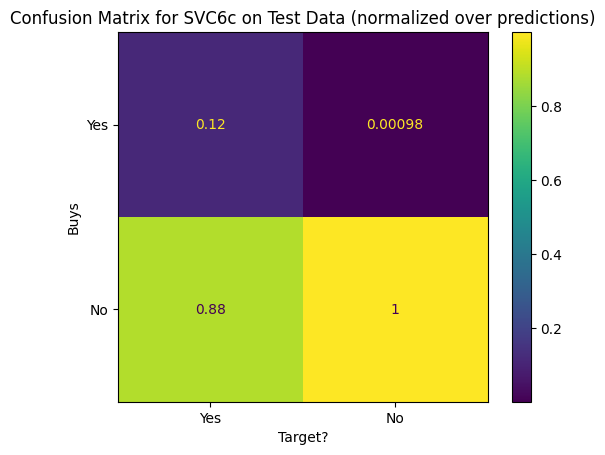

In [ ]:
CM_svc6c_test_pred = ConfusionMatrixDisplay.from_predictions(y_test, preds_svc6c_test, normalize='pred', labels=[1, 0])
configure_CM(CM_svc6c_test_pred, "Confusion Matrix for SVC6c on Test Data (normalized over predictions)")
plt.show()

svc7

Metrics for svc7 on test data: 
   Accuracy:  0.798347799604081
   Precision:  0.11487506288780815
   Recall:  0.9730113636363636
   F4:  0.6759737621176061
   F10:  0.9060015976323613

Confusion Matrix
[[  685    19]
 [ 5278 20286]]


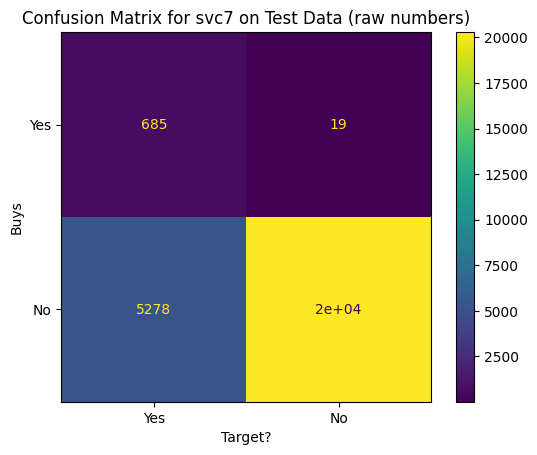

In [ ]:
preds_svc7_test = svc7.predict(X2_test)
accuracy_svc7_test = accuracy_score(y_test, preds_svc7_test)
precision_svc7_test = precision_score(y_test, preds_svc7_test)
recall_svc7_test = recall_score(y_test, preds_svc7_test)
f4_svc7_test = fbeta_score(y_test, preds_svc7_test, beta=4)
f10_svc7_test = fbeta_score(y_test, preds_svc7_test, beta=10)
cm_svc7_test = confusion_matrix(y_test, preds_svc7_test, labels=[1, 0])
FNs_svc7_test = cm_svc7_test[0, 1]
FPs_svc7_test = cm_svc7_test[1, 0]

tested_models_list.append("svc7")
test_C_list.append(svc7.C)
test_gammas.append(svc7.gamma)

test_recall.append(recall_svc7_test)
test_precision.append(precision_svc7_test)
test_accuracy.append(accuracy_svc7_test)
test_F10.append(f10_svc7_test)
test_FNs.append(FNs_svc7_test)
test_FPs.append(FPs_svc7_test)

print("Metrics for svc7 on test data: ")
print("   Accuracy: ", accuracy_svc7_test)
print("   Precision: ", precision_svc7_test)
print("   Recall: ", recall_svc7_test)
print("   F4: ", f4_svc7_test)
print("   F10: ", f10_svc7_test)
print("")
print("Confusion Matrix")
print(cm_svc7_test)

CM_svc7_test_raw = ConfusionMatrixDisplay.from_predictions(y_test, preds_svc7_test, labels=[1, 0])
configure_CM(CM_svc7_test_raw, "Confusion Matrix for svc7 on Test Data (raw numbers)")
plt.show()

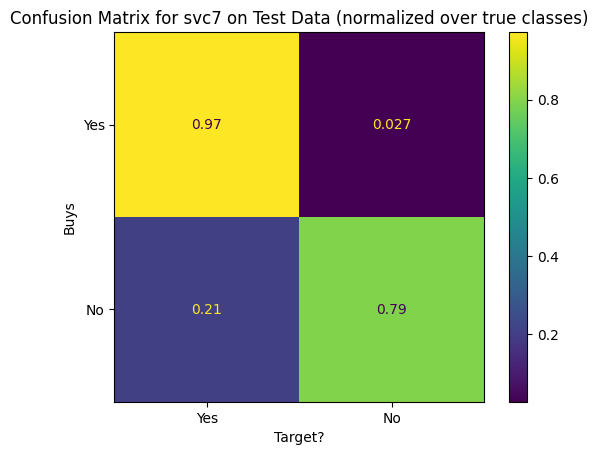

In [ ]:
CM_svc7_test_true = ConfusionMatrixDisplay.from_predictions(y_test, preds_svc7_test, normalize='true', labels=[1, 0])
configure_CM(CM_svc7_test_true, "Confusion Matrix for svc7 on Test Data (normalized over true classes)")
plt.show()

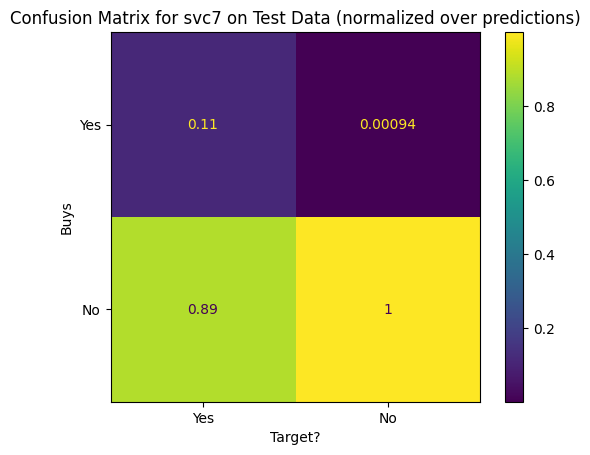

In [ ]:
CM_svc7_test_pred = ConfusionMatrixDisplay.from_predictions(y_test, preds_svc7_test, normalize='pred', labels=[1, 0])
configure_CM(CM_svc7_test_pred, "Confusion Matrix for svc7 on Test Data (normalized over predictions)")
plt.show()

svc8b

Metrics for svc8b on test data: 
   Accuracy:  0.7918760469011725
   Precision:  0.11181744091279544
   Recall:  0.9744318181818182
   F4:  0.6702684062302431
   F10:  0.9052851636506173

Confusion Matrix
[[  686    18]
 [ 5449 20115]]


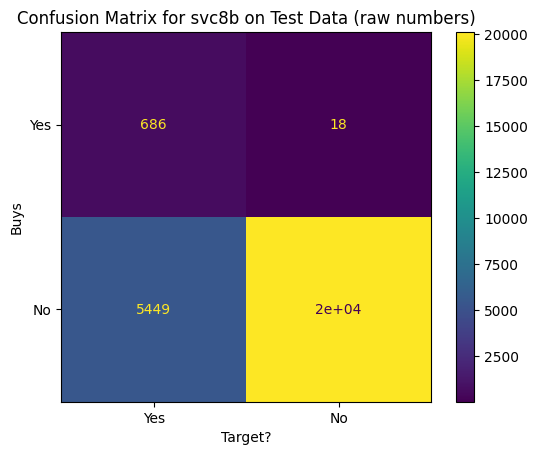

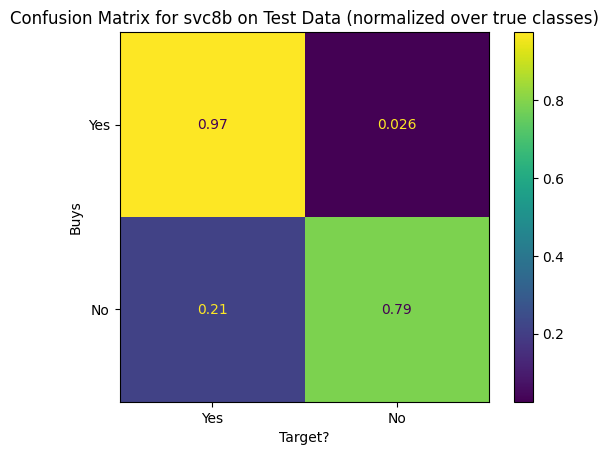

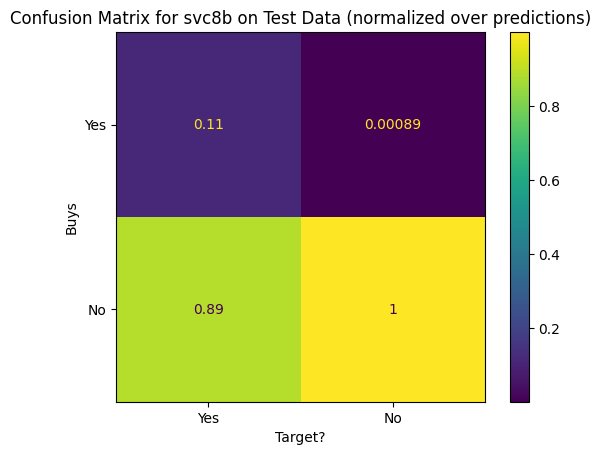

In [ ]:
preds_svc8b_test = svc8b.predict(X2_test)
accuracy_svc8b_test = accuracy_score(y_test, preds_svc8b_test)
precision_svc8b_test = precision_score(y_test, preds_svc8b_test)
recall_svc8b_test = recall_score(y_test, preds_svc8b_test)
f4_svc8b_test = fbeta_score(y_test, preds_svc8b_test, beta=4)
f10_svc8b_test = fbeta_score(y_test, preds_svc8b_test, beta=10)
cm_svc8b_test = confusion_matrix(y_test, preds_svc8b_test, labels=[1, 0])
FNs_svc8b_test = cm_svc8b_test[0, 1]
FPs_svc8b_test = cm_svc8b_test[1, 0]

tested_models_list.append("svc8b")
test_C_list.append(svc8b.C)
test_gammas.append(svc8b.gamma)

test_recall.append(recall_svc8b_test)
test_precision.append(precision_svc8b_test)
test_accuracy.append(accuracy_svc8b_test)
test_F10.append(f10_svc8b_test)
test_FNs.append(FNs_svc8b_test)
test_FPs.append(FPs_svc8b_test)


print("Metrics for svc8b on test data: ")
print("   Accuracy: ", accuracy_svc8b_test)
print("   Precision: ", precision_svc8b_test)
print("   Recall: ", recall_svc8b_test)
print("   F4: ", f4_svc8b_test)
print("   F10: ", f10_svc8b_test)
print("")
print("Confusion Matrix")
print(cm_svc8b_test)

CM_svc8b_test_raw = ConfusionMatrixDisplay.from_predictions(y_test, preds_svc8b_test, labels=[1, 0])
configure_CM(CM_svc8b_test_raw, "Confusion Matrix for svc8b on Test Data (raw numbers)")
plt.show()

CM_svc8b_test_true = ConfusionMatrixDisplay.from_predictions(y_test, preds_svc8b_test, normalize='true', labels=[1, 0])
configure_CM(CM_svc8b_test_true, "Confusion Matrix for svc8b on Test Data (normalized over true classes)")
plt.show()

CM_svc8b_test_pred = ConfusionMatrixDisplay.from_predictions(y_test, preds_svc8b_test, normalize='pred', labels=[1, 0])
configure_CM(CM_svc8b_test_pred, "Confusion Matrix for svc8b on Test Data (normalized over predictions)")
plt.show()

svc9

Metrics for svc9 on test data: 
   Accuracy:  0.7612303943962235
   Precision:  0.09919378059314714
   Recall:  0.9786931818181818
   F4:  0.6432180120812739
   F10:  0.8997103922633362

Confusion Matrix
[[  689    15]
 [ 6257 19307]]


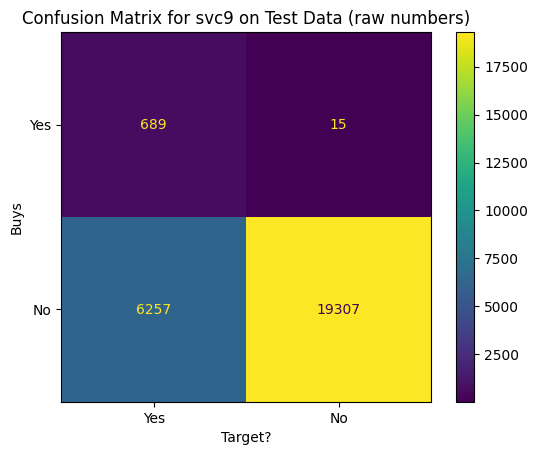

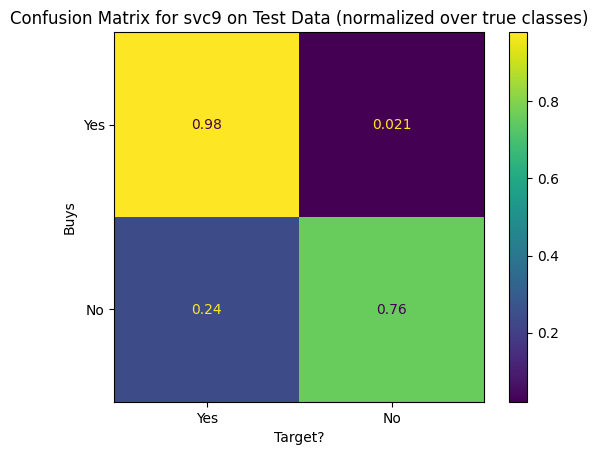

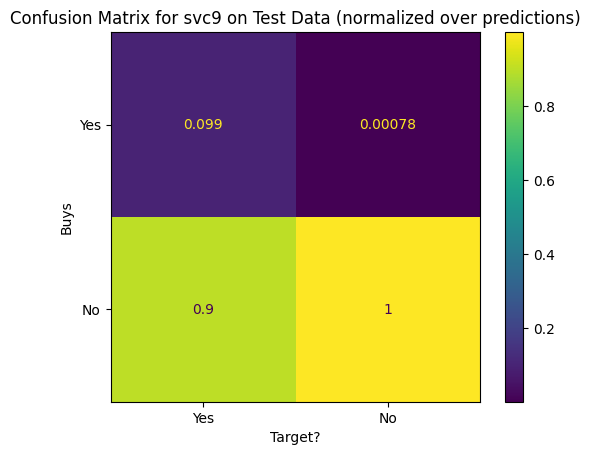

In [ ]:
preds_svc9_test = svc9.predict(X2_test)
accuracy_svc9_test = accuracy_score(y_test, preds_svc9_test)
precision_svc9_test = precision_score(y_test, preds_svc9_test)
recall_svc9_test = recall_score(y_test, preds_svc9_test)
f4_svc9_test = fbeta_score(y_test, preds_svc9_test, beta=4)
f10_svc9_test = fbeta_score(y_test, preds_svc9_test, beta=10)
cm_svc9_test = confusion_matrix(y_test, preds_svc9_test, labels=[1, 0])
FNs_svc9_test = cm_svc9_test[0, 1]
FPs_svc9_test = cm_svc9_test[1, 0]

tested_models_list.append("svc9")
test_C_list.append(svc9.C)
test_gammas.append(svc9.gamma)

test_recall.append(recall_svc9_test)
test_precision.append(precision_svc9_test)
test_accuracy.append(accuracy_svc9_test)
test_F10.append(f10_svc9_test)
test_FNs.append(FNs_svc9_test)
test_FPs.append(FPs_svc9_test)


print("Metrics for svc9 on test data: ")
print("   Accuracy: ", accuracy_svc9_test)
print("   Precision: ", precision_svc9_test)
print("   Recall: ", recall_svc9_test)
print("   F4: ", f4_svc9_test)
print("   F10: ", f10_svc9_test)
print("")
print("Confusion Matrix")
print(cm_svc9_test)

CM_svc9_test_raw = ConfusionMatrixDisplay.from_predictions(y_test, preds_svc9_test, labels=[1, 0])
configure_CM(CM_svc9_test_raw, "Confusion Matrix for svc9 on Test Data (raw numbers)")
plt.show()

CM_svc9_test_true = ConfusionMatrixDisplay.from_predictions(y_test, preds_svc9_test, normalize='true', labels=[1, 0])
configure_CM(CM_svc9_test_true, "Confusion Matrix for svc9 on Test Data (normalized over true classes)")
plt.show()

CM_svc9_test_pred = ConfusionMatrixDisplay.from_predictions(y_test, preds_svc9_test, normalize='pred', labels=[1, 0])
configure_CM(CM_svc9_test_pred, "Confusion Matrix for svc9 on Test Data (normalized over predictions)")
plt.show()

svc9a

In [ ]:
len(y_test)

26268

Metrics for svc9a on test data: 
   Accuracy:  0.614245469773108
   Precision:  0.06456082017179274
   Recall:  0.9928977272727273
   F4:  0.5379113666198905
   F10:  0.869156807465498

Confusion Matrix
[[  699     5]
 [10128 15436]]


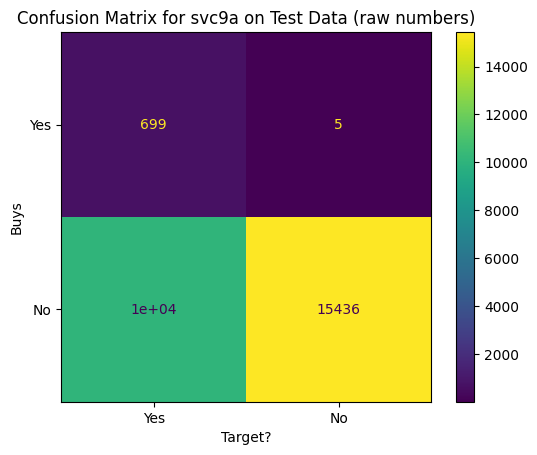

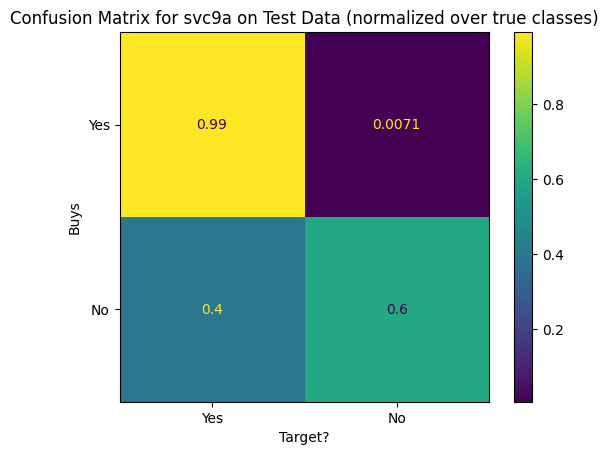

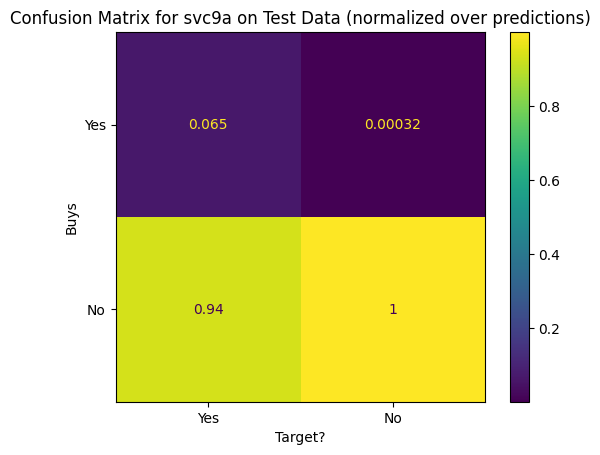

In [ ]:
preds_svc9a_test = svc9a.predict(X2_test)
accuracy_svc9a_test = accuracy_score(y_test, preds_svc9a_test)
precision_svc9a_test = precision_score(y_test, preds_svc9a_test)
recall_svc9a_test = recall_score(y_test, preds_svc9a_test)
f4_svc9a_test = fbeta_score(y_test, preds_svc9a_test, beta=4)
f10_svc9a_test = fbeta_score(y_test, preds_svc9a_test, beta=10)
cm_svc9a_test = confusion_matrix(y_test, preds_svc9a_test, labels=[1, 0])
FNs_svc9a_test = cm_svc9a_test[0, 1]
FPs_svc9a_test = cm_svc9a_test[1, 0]

tested_models_list.append("svc9a")
test_C_list.append(svc9a.C)
test_gammas.append(svc9a.gamma)

test_recall.append(recall_svc9a_test)
test_precision.append(precision_svc9a_test)
test_accuracy.append(accuracy_svc9a_test)
test_F10.append(f10_svc9a_test)
test_FNs.append(FNs_svc9a_test)
test_FPs.append(FPs_svc9a_test)


print("Metrics for svc9a on test data: ")
print("   Accuracy: ", accuracy_svc9a_test)
print("   Precision: ", precision_svc9a_test)
print("   Recall: ", recall_svc9a_test)
print("   F4: ", f4_svc9a_test)
print("   F10: ", f10_svc9a_test)
print("")
print("Confusion Matrix")
print(cm_svc9a_test)

CM_svc9a_test_raw = ConfusionMatrixDisplay.from_predictions(y_test, preds_svc9a_test, labels=[1, 0])
configure_CM(CM_svc9a_test_raw, "Confusion Matrix for svc9a on Test Data (raw numbers)")
plt.show()

CM_svc9a_test_true = ConfusionMatrixDisplay.from_predictions(y_test, preds_svc9a_test, normalize='true', labels=[1, 0])
configure_CM(CM_svc9a_test_true, "Confusion Matrix for svc9a on Test Data (normalized over true classes)")
plt.show()

CM_svc9a_test_pred = ConfusionMatrixDisplay.from_predictions(y_test, preds_svc9a_test, normalize='pred', labels=[1, 0])
configure_CM(CM_svc9a_test_pred, "Confusion Matrix for svc9a on Test Data (normalized over predictions)")
plt.show()

Results Comparison

In [ ]:
test_results = pd.DataFrame({
    'Model': tested_models_list,
    'C': test_C_list,
    'Gamma': test_gammas,
    'Recall': test_recall,
    'Precision': test_precision,
    'Accuracy': test_accuracy,
    'F10': test_F10,
    'FNs': test_FNs,
    'FPs': test_FPs
})

tested_models_by_recall = test_results.sort_values('Recall', ascending=False)
tested_models_by_F10 = test_results.sort_values('F10', ascending=False)
tested_models_by_recall.reset_index(inplace=True, drop=True)
tested_models_by_F10.reset_index(inplace=True, drop=True)

In [ ]:
tested_models_by_recall

,Model,C,Gamma,Recall,Precision,Accuracy,F10,FNs,FPs
0,svc9a,0.05,0.001,0.992898,0.064561,0.614245,0.869157,5,10128
1,svc9,0.05,0.005,0.978693,0.099194,0.761230,0.899710,15,6257
2,svc8b,0.05,0.01,0.974432,0.111817,0.791876,0.905285,18,5449
3,svc7,0.10,0.01,0.973011,0.114875,0.798348,0.906002,19,5278
4,SVC6c,0.10,scale,0.971591,0.117163,0.803030,0.906162,20,5154


In [ ]:
tested_models_by_F10

,Model,C,Gamma,Recall,Precision,Accuracy,F10,FNs,FPs
0,SVC6c,0.10,scale,0.971591,0.117163,0.803030,0.906162,20,5154
1,svc7,0.10,0.01,0.973011,0.114875,0.798348,0.906002,19,5278
2,svc8b,0.05,0.01,0.974432,0.111817,0.791876,0.905285,18,5449
3,svc9,0.05,0.005,0.978693,0.099194,0.761230,0.899710,15,6257
4,svc9a,0.05,0.001,0.992898,0.064561,0.614245,0.869157,5,10128
